# TCC - Previsão de Preços de Apartamentos em Curitiba-PR (Bairros Selecionados)


# 1. Importação das bibliotecas

In [432]:
import pandas as pd
import numpy as np
from tabula import read_pdf
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 2. Importação e preparação das bases de dados

## 2.1 Base de dados Apartamentos

In [433]:
#Dados = pd.read_csv('http://leg.ufpr.br/~walmes/data/ap_venda7bairros_cwb_210314.txt', sep='\t')
Apart = pd.read_csv('ap_venda7bairros_cwb_210314.txt', sep='\t')
Apart.shape

(4470, 7)

In [434]:
Apart.head()

,preco,area,quartos,banheiros,vagas,suites,bairro
0,286000,63.00,2.0,2.0,1.0,1.0,portao
1,328000,75.00,3.0,2.0,1.0,1.0,portao
2,370000,62.77,2.0,2.0,2.0,1.0,portao
3,295000,62.88,2.0,2.0,1.0,1.0,portao
4,260000,75.00,3.0,2.0,1.0,1.0,portao


In [435]:
Apart.dtypes

preco          int64
area         float64
quartos      float64
banheiros    float64
vagas        float64
suites       float64
bairro        object
dtype: object

In [436]:
Apart.describe()

,preco,area,quartos,banheiros,vagas,suites
count,4.470000e+03,4470.000000,4422.000000,3440.000000,3937.000000,3309.000000
mean,7.575370e+05,125.777078,2.727499,2.455233,1.873762,1.530976
std,7.433530e+05,90.875402,0.905216,1.435955,0.964863,0.906459
min,7.500000e+02,17.200000,1.000000,1.000000,1.000000,1.000000
25%,3.411300e+05,68.000000,2.000000,1.000000,1.000000,1.000000
50%,5.200000e+05,100.000000,3.000000,2.000000,2.000000,1.000000
75%,8.570000e+05,155.110000,3.000000,3.000000,2.000000,2.000000
max,9.000000e+06,960.000000,6.000000,10.000000,11.000000,5.000000


## 2.2 Base de dados Bairros

In [437]:
#!pip install tabula-py
from tabula import read_pdf
Bairros = read_pdf("Bairros_DIEESE.pdf", pages='64', stream=True, area='left')
Bairros = Bairros[0]
Bairros = Bairros.drop(['Unnamed: 1'],axis=1)
Bairros = Bairros.iloc[5:46].reset_index()
Bairros = Bairros['Unnamed: 0'].str.rsplit(n=5)

Bairros = pd.DataFrame(Bairros)

Bairros['Bairro'] = Bairros['Unnamed: 0'][5][0]
Bairros['População'] = Bairros['Unnamed: 0'][5][1]
Bairros['População(%)']= Bairros['Unnamed: 0'][5][2]
Bairros['Área(km2)']= Bairros['Unnamed: 0'][5][3]
Bairros['Área(%)']= Bairros['Unnamed: 0'][5][4]
Bairros['Habitantes/km2']= Bairros['Unnamed: 0'][5][5]


for i in range(0,len(Bairros)):
    Bairros['Bairro'][i] = Bairros['Unnamed: 0'][i][0]
    Bairros['População'][i] = Bairros['Unnamed: 0'][i][1]
    Bairros['População(%)'][i] = Bairros['Unnamed: 0'][i][2]
    Bairros['Área(km2)'][i] = Bairros['Unnamed: 0'][i][3]
    Bairros['Área(%)'][i] = Bairros['Unnamed: 0'][i][4]
    Bairros['Habitantes/km2'][i] = Bairros['Unnamed: 0'][i][5]

Bairros = Bairros.drop(['Unnamed: 0'], axis=1)
Bairros = Bairros.drop([40])
Bairros.head()

,Bairro,População,População(%),Área(km2),Área(%),Habitantes/km2
0,Centro,37.234,"2,1",3.310,"0,8","11,2"
1,Água Verde,51.461,"2,9",4.850,"1,1","10,6"
2,Sítio Cercado,115.584,"6,6",11.252,"2,6","10,3"
3,Batel e Bigorrilho,39.234,"2,2",4.633,"1,1","8,5"
4,Cajuru,96.170,"5,5",11.781,"2,7","8,2"


In [438]:
Bairros.shape

(40, 6)

In [439]:
Bairros.dtypes

Bairro            object
População         object
População(%)      object
Área(km2)         object
Área(%)           object
Habitantes/km2    object
dtype: object

In [440]:
def corrigir_nomes(nome):
    nome = nome.replace('.', '').replace(',', '.')
    return nome
Bairros['População'] = Bairros['População'].astype('string').apply(corrigir_nomes)
Bairros['População(%)'] = Bairros['População(%)'].astype('string').apply(corrigir_nomes)
Bairros['Área(km2)'] = Bairros['Área(km2)'].astype('string').apply(corrigir_nomes)
Bairros['Área(%)'] = Bairros['Área(%)'].astype('string').apply(corrigir_nomes)
Bairros['Habitantes/km2'] = Bairros['Habitantes/km2'].astype('string').apply(corrigir_nomes)
Bairros.head()

,Bairro,População,População(%),Área(km2),Área(%),Habitantes/km2
0,Centro,37234,2.1,3310,0.8,11.2
1,Água Verde,51461,2.9,4850,1.1,10.6
2,Sítio Cercado,115584,6.6,11252,2.6,10.3
3,Batel e Bigorrilho,39234,2.2,4633,1.1,8.5
4,Cajuru,96170,5.5,11781,2.7,8.2


In [441]:
Bairros['População'] = pd.to_numeric(Bairros['População'])
Bairros['População(%)'] = pd.to_numeric(Bairros['População(%)'])
Bairros['Área(km2)'] = pd.to_numeric(Bairros['Área(km2)'])
Bairros['Área(%)'] = pd.to_numeric(Bairros['Área(%)'])
Bairros['Habitantes/km2'] = pd.to_numeric(Bairros['Habitantes/km2'])

Bairros.dtypes

Bairro             object
População           int64
População(%)      float64
Área(km2)           int64
Área(%)           float64
Habitantes/km2    float64
dtype: object

In [442]:
Bairros.shape

(40, 6)

## 2.3 Junção dos Dataframes

In [443]:
Bairros['Bairro'].unique()

array(['Centro', 'Água Verde', 'Sítio Cercado', 'Batel e Bigorrilho',
       'Cajuru', 'Fazendinha', 'Novo Mundo', 'Portão',
       'Vila Izabel e Santa Quitéria', 'Capão Razo',
       'Centro Cívico e Juveve', 'Bairro Alto', 'Cabral', 'Xaxim',
       'Boa vista', 'Guaíra e Fanny', 'Uberaba', 'Pinheirinho',
       'Tatuquara', 'Boqueirão e Hauer', 'Alto Boqueirão',
       'Atuba e Tinguí', 'Alto da XV expandido', 'Rebouças expandido',
       'Guabirotuba e Jardim das Américas', 'Barreirinha e Cachoeira',
       'Cidade Industrial', 'Capão da Embuia e Tarumã', 'Pilarzinho',
       'São Braz e Santo Inácio', 'Campo Comprido',
       'São Francisco expandido', 'Bacacheri',
       'Campina do Siqueira expandido', 'Santa Cândida',
       'Abranches expandido', 'Santa Felicidade expandido',
       'Campo do Santana e Caximba', 'Ganchinho e Umbará', 'CIC norte'],
      dtype=object)

In [444]:
Apart['bairro'].unique()

array(['portao', 'agua-verde', 'centro', 'ecoville', 'batel', 'cabral',
       'cristo-rei'], dtype=object)

In [445]:
Bairros['bairro']=Bairros['Bairro'].str.lower()
Bairros['bairro']=Bairros['bairro'].replace('água verde','agua-verde'
                                           ).replace('batel e bigorrilho','batel'
                                                    ).replace('alto da xv expandido','cristo-rei'
                                                             ).replace('campina do siqueira expandido','ecoville'
                                                                      ).replace('portão','portao')
Bairros.head()

,Bairro,População,População(%),Área(km2),Área(%),Habitantes/km2,bairro
0,Centro,37234,2.1,3310,0.8,11.2,centro
1,Água Verde,51461,2.9,4850,1.1,10.6,agua-verde
2,Sítio Cercado,115584,6.6,11252,2.6,10.3,sítio cercado
3,Batel e Bigorrilho,39234,2.2,4633,1.1,8.5,batel
4,Cajuru,96170,5.5,11781,2.7,8.2,cajuru


In [446]:
#Join dos datasets para análise
Dados = Apart.merge(Bairros, left_on='bairro', right_on='bairro')
Dados.rename(columns={'Habitantes/km2': 'Densidade_populacional'}, inplace = True)
Dados.rename(columns={'Área(km2)': 'Area_bairro'}, inplace = True)
Dados = Dados.drop(['Bairro'], axis=1)
Dados.head()

,preco,area,quartos,banheiros,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional
0,286000,63.00,2.0,2.0,1.0,1.0,portao,42038,2.4,5838,1.3,7.2
1,328000,75.00,3.0,2.0,1.0,1.0,portao,42038,2.4,5838,1.3,7.2
2,370000,62.77,2.0,2.0,2.0,1.0,portao,42038,2.4,5838,1.3,7.2
3,295000,62.88,2.0,2.0,1.0,1.0,portao,42038,2.4,5838,1.3,7.2
4,260000,75.00,3.0,2.0,1.0,1.0,portao,42038,2.4,5838,1.3,7.2


In [447]:
#Acrescentando a coluna de preço/metro²
Dados['preco_metro'] = Dados['preco']/Dados['area']

In [448]:
#convertendo bairro para categorical
Dados['bairro'] = Dados['bairro'].astype('category')
Dados.dtypes

preco                        int64
area                       float64
quartos                    float64
banheiros                  float64
vagas                      float64
suites                     float64
bairro                    category
População                    int64
População(%)               float64
Area_bairro                  int64
Área(%)                    float64
Densidade_populacional     float64
preco_metro                float64
dtype: object

# 3. Tratamento e visualização dos dados

## 3.1 Missing Values

In [449]:
Dados.loc[(Dados['suites'].isna()==True) & (Dados['banheiros'].isna()==True)]

,preco,area,quartos,banheiros,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro
55,250000,66.95,3.0,NaN,1.0,NaN,portao,42038,2.4,5838,1.3,7.2,3734.129948
84,689691,104.00,3.0,NaN,2.0,NaN,portao,42038,2.4,5838,1.3,7.2,6631.644231
93,220000,58.00,3.0,NaN,NaN,NaN,portao,42038,2.4,5838,1.3,7.2,3793.103448
97,295000,109.00,3.0,NaN,1.0,NaN,portao,42038,2.4,5838,1.3,7.2,2706.422018
106,333195,75.00,3.0,NaN,1.0,NaN,portao,42038,2.4,5838,1.3,7.2,4442.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4414,222921,58.00,1.0,NaN,2.0,NaN,cristo-rei,37565,2.1,8896,2.0,4.2,3843.465517
4433,221433,62.00,1.0,NaN,2.0,NaN,cristo-rei,37565,2.1,8896,2.0,4.2,3571.500000
4440,203391,55.00,1.0,NaN,1.0,NaN,cristo-rei,37565,2.1,8896,2.0,4.2,3698.018182
4441,219945,61.00,1.0,NaN,2.0,NaN,cristo-rei,37565,2.1,8896,2.0,4.2,3605.655738


In [450]:
Dados.isna().sum()

preco                        0
area                         0
quartos                     48
banheiros                 1030
vagas                      533
suites                    1161
bairro                       0
População                    0
População(%)                 0
Area_bairro                  0
Área(%)                      0
Densidade_populacional       0
preco_metro                  0
dtype: int64

In [451]:
Dados = Dados.dropna()
Dados.shape

(2652, 13)

In [452]:
Dados.isna().sum()

preco                     0
area                      0
quartos                   0
banheiros                 0
vagas                     0
suites                    0
bairro                    0
População                 0
População(%)              0
Area_bairro               0
Área(%)                   0
Densidade_populacional    0
preco_metro               0
dtype: int64

## 3.2 Dados Duplicados

In [453]:
Dados[Dados.duplicated(keep=False)]

,preco,area,quartos,banheiros,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro
0,286000,63.0,2.0,2.0,1.0,1.0,portao,42038,2.4,5838,1.3,7.2,4539.682540
1,328000,75.0,3.0,2.0,1.0,1.0,portao,42038,2.4,5838,1.3,7.2,4373.333333
5,328000,75.0,3.0,2.0,1.0,1.0,portao,42038,2.4,5838,1.3,7.2,4373.333333
6,328000,75.0,3.0,2.0,1.0,1.0,portao,42038,2.4,5838,1.3,7.2,4373.333333
7,790000,129.0,3.0,5.0,2.0,3.0,portao,42038,2.4,5838,1.3,7.2,6124.031008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4366,420000,83.0,3.0,2.0,1.0,1.0,cristo-rei,37565,2.1,8896,2.0,4.2,5060.240964
4371,831631,143.0,4.0,3.0,2.0,1.0,cristo-rei,37565,2.1,8896,2.0,4.2,5815.601399
4374,684900,123.0,3.0,3.0,2.0,1.0,cristo-rei,37565,2.1,8896,2.0,4.2,5568.292683
4383,300000,68.0,3.0,2.0,1.0,1.0,cristo-rei,37565,2.1,8896,2.0,4.2,4411.764706


## 3.3 Tratamento de Outliers

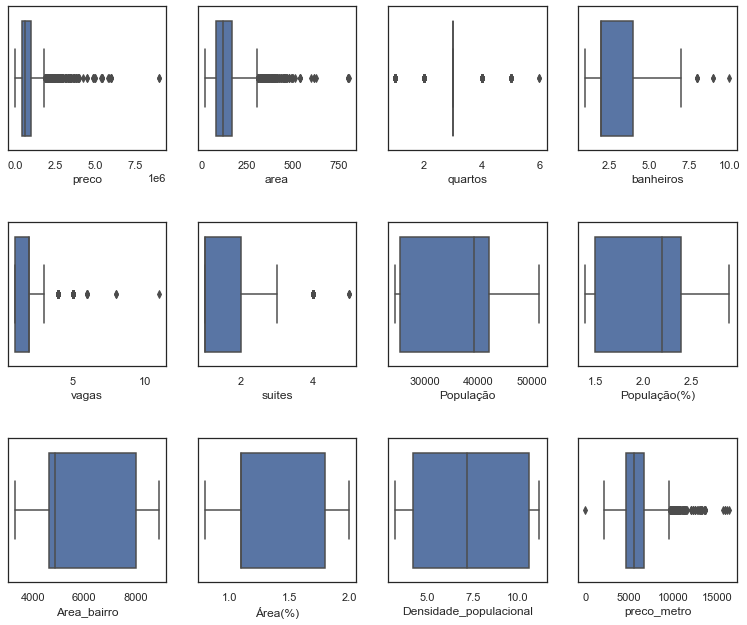

In [454]:
#Geração de boxplot para visualização de outliers
plt.figure(figsize = (15, 10))
plt.subplot(341)
sns.boxplot(x='preco',data = Dados, orient='h')
plt.subplot(342)
sns.boxplot(x='area',data = Dados, orient='h')
plt.subplot(343)
sns.boxplot(x='quartos',data = Dados, orient='h')
plt.subplot(344)
sns.boxplot(x='banheiros',data = Dados, orient='h')
plt.subplot(345)
sns.boxplot(x='vagas',data = Dados, orient='h')
plt.subplot(346)
sns.boxplot(x='suites',data = Dados, orient='h')
plt.subplot(347)
sns.boxplot(x='População',data = Dados, orient='h')
plt.subplot(348)
sns.boxplot(x='População(%)',data = Dados, orient='h')
plt.subplot(349)
sns.boxplot(x='Area_bairro',data = Dados, orient='h')
plt.subplot(3,4,10)
sns.boxplot(x='Área(%)',data = Dados, orient='h')
plt.subplot(3,4,11)
sns.boxplot(x='Densidade_populacional',data = Dados, orient='h')
plt.subplot(3,4,12)
sns.boxplot(x='preco_metro',data = Dados, orient='h')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.5)
plt.show()

In [455]:
# variáveis quartos
Dados.groupby(['quartos']).count()

,preco,area,banheiros,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro
quartos,,,,,,,,,,,,
1.0,54,54,54,54,54,54,54,54,54,54,54,54
2.0,517,517,517,517,517,517,517,517,517,517,517,517
3.0,1499,1499,1499,1499,1499,1499,1499,1499,1499,1499,1499,1499
4.0,558,558,558,558,558,558,558,558,558,558,558,558
5.0,22,22,22,22,22,22,22,22,22,22,22,22
6.0,2,2,2,2,2,2,2,2,2,2,2,2


In [456]:
#registros com 6 quartos
Dados.loc[Dados['quartos'] >= 6]

,preco,area,quartos,banheiros,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro
1009,1080000,243.0,6.0,4.0,2.0,1.0,agua-verde,51461,2.9,4850,1.1,10.6,4444.444444
3056,1500000,390.0,6.0,6.0,2.0,2.0,batel,39234,2.2,4633,1.1,8.5,3846.153846


In [457]:
#removendo os registros com mais de 5 quartos
Dados = Dados.loc[Dados['quartos'] < 6]

In [458]:
# variáveis quartos
Dados.groupby(['quartos']).count()

,preco,area,banheiros,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro
quartos,,,,,,,,,,,,
1.0,54,54,54,54,54,54,54,54,54,54,54,54
2.0,517,517,517,517,517,517,517,517,517,517,517,517
3.0,1499,1499,1499,1499,1499,1499,1499,1499,1499,1499,1499,1499
4.0,558,558,558,558,558,558,558,558,558,558,558,558
5.0,22,22,22,22,22,22,22,22,22,22,22,22


In [459]:
# variáveis banheiros
Dados.groupby(['banheiros']).count()

,preco,area,quartos,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro
banheiros,,,,,,,,,,,,
1.0,409,409,409,409,409,409,409,409,409,409,409,409
2.0,972,972,972,972,972,972,972,972,972,972,972,972
3.0,548,548,548,548,548,548,548,548,548,548,548,548
4.0,333,333,333,333,333,333,333,333,333,333,333,333
5.0,275,275,275,275,275,275,275,275,275,275,275,275
6.0,78,78,78,78,78,78,78,78,78,78,78,78
7.0,27,27,27,27,27,27,27,27,27,27,27,27
8.0,5,5,5,5,5,5,5,5,5,5,5,5
9.0,2,2,2,2,2,2,2,2,2,2,2,2


In [460]:
#registros com 8 ou mais banheiros
Dados.loc[Dados['banheiros'] >= 8]

,preco,area,quartos,banheiros,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro
2349,9000000,800.0,4.0,8.0,8.0,4.0,ecoville,25493,1.5,8007,1.8,3.2,11250.000000
2482,6000000,802.0,4.0,9.0,6.0,4.0,ecoville,25493,1.5,8007,1.8,3.2,7481.296758
2915,2650000,449.0,5.0,8.0,5.0,5.0,batel,39234,2.2,4633,1.1,8.5,5902.004454
3304,830000,227.0,4.0,9.0,2.0,4.0,batel,39234,2.2,4633,1.1,8.5,3656.387665
3332,1950000,330.0,4.0,10.0,4.0,4.0,batel,39234,2.2,4633,1.1,8.5,5909.090909
3665,6017000,452.0,4.0,8.0,5.0,4.0,cabral,24556,1.4,3930,0.9,6.2,13311.946903
3667,6017000,452.0,4.0,8.0,5.0,4.0,cabral,24556,1.4,3930,0.9,6.2,13311.946903
4020,2200000,400.0,4.0,8.0,5.0,4.0,cabral,24556,1.4,3930,0.9,6.2,5500.000000


In [461]:
#removendo os registros com mais de 8 banheiros
Dados = Dados.loc[Dados['banheiros'] < 8]

In [462]:
# variáveis banheiros
Dados.groupby(['banheiros']).count()

,preco,area,quartos,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro
banheiros,,,,,,,,,,,,
1.0,409,409,409,409,409,409,409,409,409,409,409,409
2.0,972,972,972,972,972,972,972,972,972,972,972,972
3.0,548,548,548,548,548,548,548,548,548,548,548,548
4.0,333,333,333,333,333,333,333,333,333,333,333,333
5.0,275,275,275,275,275,275,275,275,275,275,275,275
6.0,78,78,78,78,78,78,78,78,78,78,78,78
7.0,27,27,27,27,27,27,27,27,27,27,27,27


In [463]:
# variáveis vagas
Dados.groupby(['vagas']).count()

,preco,area,quartos,banheiros,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro
vagas,,,,,,,,,,,,
1.0,900,900,900,900,900,900,900,900,900,900,900,900
2.0,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172
3.0,360,360,360,360,360,360,360,360,360,360,360,360
4.0,171,171,171,171,171,171,171,171,171,171,171,171
5.0,32,32,32,32,32,32,32,32,32,32,32,32
6.0,5,5,5,5,5,5,5,5,5,5,5,5
8.0,1,1,1,1,1,1,1,1,1,1,1,1
11.0,1,1,1,1,1,1,1,1,1,1,1,1


In [464]:
#registros com 6 ou mais vagas
Dados.loc[Dados['vagas'] >= 6]

,preco,area,quartos,banheiros,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro
795,2200000,240.0,2.0,4.0,6.0,2.0,agua-verde,51461,2.9,4850,1.1,10.6,9166.666667
1089,545000,109.0,3.0,2.0,11.0,1.0,agua-verde,51461,2.9,4850,1.1,10.6,5000.000000
1229,5800000,806.0,4.0,1.0,6.0,4.0,agua-verde,51461,2.9,4850,1.1,10.6,7196.029777
2207,9000000,800.0,4.0,2.0,8.0,4.0,ecoville,25493,1.5,8007,1.8,3.2,11250.000000
2276,6000000,801.0,4.0,5.0,6.0,4.0,ecoville,25493,1.5,8007,1.8,3.2,7490.636704
3062,1580000,350.0,4.0,4.0,6.0,4.0,batel,39234,2.2,4633,1.1,8.5,4514.285714
3646,3500000,600.0,4.0,7.0,6.0,4.0,cabral,24556,1.4,3930,0.9,6.2,5833.333333


In [465]:
#removendo os registros com mais de 6 vagas
Dados = Dados.loc[Dados['vagas'] < 6]

In [466]:
# variáveis vagas
Dados.groupby(['vagas']).count()

,preco,area,quartos,banheiros,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro
vagas,,,,,,,,,,,,
1.0,900,900,900,900,900,900,900,900,900,900,900,900
2.0,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172
3.0,360,360,360,360,360,360,360,360,360,360,360,360
4.0,171,171,171,171,171,171,171,171,171,171,171,171
5.0,32,32,32,32,32,32,32,32,32,32,32,32


In [467]:
# variáveis suites
Dados.groupby(['suites']).count()

,preco,area,quartos,banheiros,vagas,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro
suites,,,,,,,,,,,,
1.0,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861
2.0,344,344,344,344,344,344,344,344,344,344,344,344
3.0,304,304,304,304,304,304,304,304,304,304,304,304
4.0,124,124,124,124,124,124,124,124,124,124,124,124
5.0,2,2,2,2,2,2,2,2,2,2,2,2


In [468]:
#registros com mais de 4 suites
Dados.loc[Dados['suites'] >= 5]

,preco,area,quartos,banheiros,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro
2672,3800000,390.98,5.0,6.0,3.0,5.0,ecoville,25493,1.5,8007,1.8,3.2,9719.167221
3298,1600000,296.00,5.0,6.0,3.0,5.0,batel,39234,2.2,4633,1.1,8.5,5405.405405


In [469]:
#removendo os registros com mais de 5 suites
Dados = Dados.loc[Dados['suites'] < 5]

In [470]:
# variáveis suites
Dados.groupby(['suites']).count()

,preco,area,quartos,banheiros,vagas,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro
suites,,,,,,,,,,,,
1.0,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861
2.0,344,344,344,344,344,344,344,344,344,344,344,344
3.0,304,304,304,304,304,304,304,304,304,304,304,304
4.0,124,124,124,124,124,124,124,124,124,124,124,124


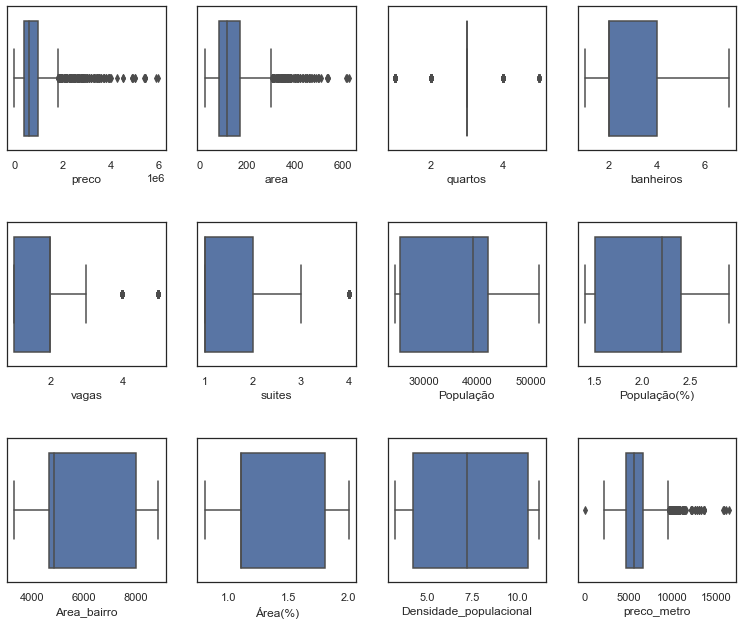

In [471]:
#Geração de boxplot para visualização de outliers
plt.figure(figsize = (15, 10))
plt.subplot(341)
sns.boxplot(x='preco',data = Dados, orient='h')
plt.subplot(342)
sns.boxplot(x='area',data = Dados, orient='h')
plt.subplot(343)
sns.boxplot(x='quartos',data = Dados, orient='h')
plt.subplot(344)
sns.boxplot(x='banheiros',data = Dados, orient='h')
plt.subplot(345)
sns.boxplot(x='vagas',data = Dados, orient='h')
plt.subplot(346)
sns.boxplot(x='suites',data = Dados, orient='h')
plt.subplot(347)
sns.boxplot(x='População',data = Dados, orient='h')
plt.subplot(348)
sns.boxplot(x='População(%)',data = Dados, orient='h')
plt.subplot(349)
sns.boxplot(x='Area_bairro',data = Dados, orient='h')
plt.subplot(3,4,10)
sns.boxplot(x='Área(%)',data = Dados, orient='h')
plt.subplot(3,4,11)
sns.boxplot(x='Densidade_populacional',data = Dados, orient='h')
plt.subplot(3,4,12)
sns.boxplot(x='preco_metro',data = Dados, orient='h')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.5)
plt.show()

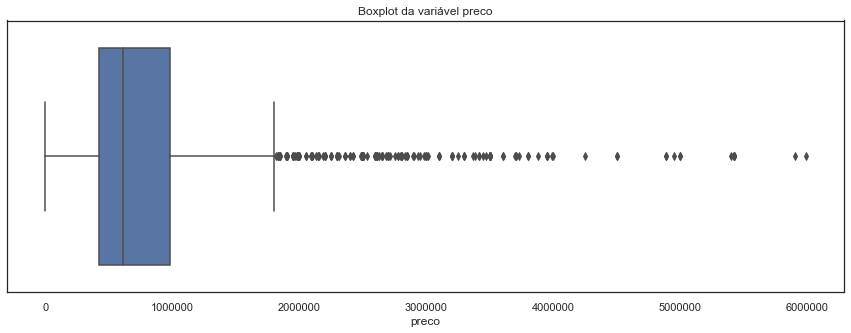

In [472]:
plt.figure(figsize = (15, 5))
sns.boxplot(x='preco',data = Dados, orient='h')
plt.title("Boxplot da variável preco")
plt.ticklabel_format(axis='x', style='plain' )

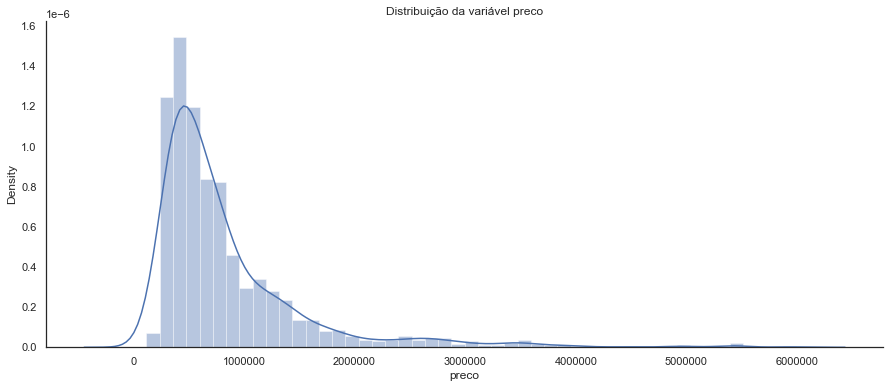

In [473]:
# Distribuição da variável 'preco'
sns.distplot(Dados['preco'])
plt.title("Distribuição da variável preco")
plt.ticklabel_format(axis='x', style='plain' )
sns.despine()

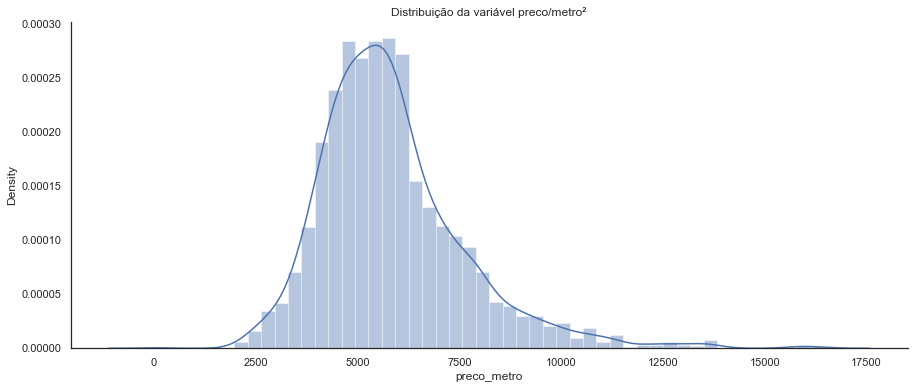

In [474]:
# Distribuição da variável 'preco_metro'
sns.distplot(Dados['preco_metro'])
plt.title("Distribuição da variável preco/metro²")
plt.ticklabel_format(axis='x', style='plain' )
sns.despine()

In [475]:
Dados.loc[Dados['preco_metro'] < 2000]

,preco,area,quartos,banheiros,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro
3266,750,145.0,3.0,5.0,2.0,3.0,batel,39234,2.2,4633,1.1,8.5,5.172414


In [476]:
#Embora não se trate de outlier, verificamos o erro no anúncio do preço e vamor corrigí-lo para evitar distorçoes
#Substituição do valor do preço de registro em que o valor do preço/metro² era inferior a R$ 2.000,00.
Dados.loc[Dados['preco_metro'] < 2000,'preco']=750000
Dados.loc[Dados['preco_metro'] < 2000,'preco']

3266    750000
Name: preco, dtype: int64

In [477]:
#Atualizando a coluna de preço/metro² com valores obtidos a partir da variável "preco_so"
Dados['preco_metro'] = Dados['preco']/Dados['area']

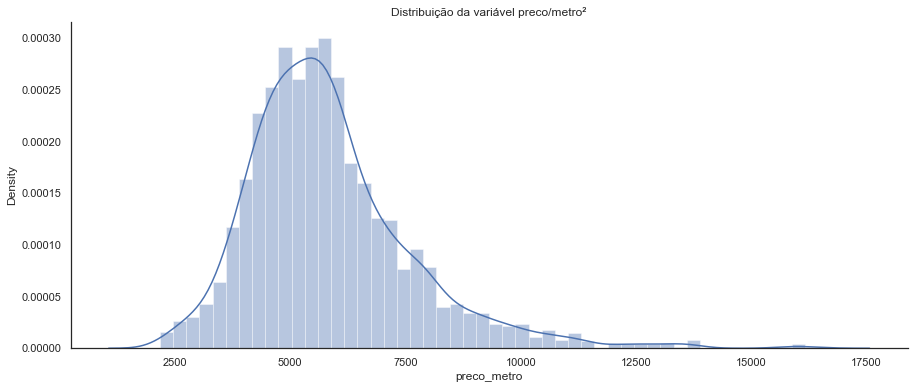

In [478]:
# Distribuição da variável 'preco'
sns.distplot(Dados['preco_metro'])
plt.title("Distribuição da variável preco/metro²")
plt.ticklabel_format(axis='x', style='plain' )
sns.despine()

In [479]:
# Cálculo de Q1, Q3 e IQR:
Q1 = np.percentile(Dados['preco'], 25)
Q3 = np.percentile(Dados['preco'], 75)
IQR = Q3 - Q1
print(f"IQR: {IQR}")

# Cálculo dos limites inferiores e superiores para detecção de outliers:
limite_inferior_outliers = Q1 - 1.5*IQR
limite_superior_outliers = Q3 + 1.5*IQR
print(f"Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")

IQR: 560000.0
Limite inferior para outlier: -420000.0; Limite superior para outliers: 1820000.0


In [480]:
Dados.columns

Index(['preco', 'area', 'quartos', 'banheiros', 'vagas', 'suites', 'bairro',
       'População', 'População(%)', 'Area_bairro', 'Área(%)',
       'Densidade_populacional', 'preco_metro'],
      dtype='object')

In [481]:
#Criação do modelo preliminar, utilizando a biblioteca statsmodel
#(apenas com os atributos mais relevantes => Valor P < 0,05)
modelo_preliminar = sm.ols(formula = 'preco ~ area + vagas + suites + População\
                            + Area_bairro + Densidade_populacional + preco_metro', data = Dados)
modelo_preliminar_treinado = modelo_preliminar.fit()
modelo_preliminar_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  preco   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     5168.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:14:40   Log-Likelihood:                -35678.
No. Observations:                2633   AIC:                         7.137e+04
Df Residuals:                    2625   BIC:                         7.142e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -7.622e+05   4.89e+04    -15.583      0.000   -8.58e+05   -6.66e+05
area                    6450.4122     81.555     79.093      0.000    6290.493    6610.331
vagas                  -4.761e+04   7335.016     -6.490      0.000    -6.2e+04   -3.32e+04
suites                  3.853e+04   6616.176      5.824      0.000    2.56e+04    5.15e+04
População                 10.8695      1.271      8.551      0.000       8.377      13.362
Area_bairro              -55.0762      6.974     -7.898      0.000     -68.751     -41.401
Densidade_populacional  -6.52e+04   6915.436     -9.429      0.000   -7.88e+04   -5.16e+04
preco_metro              193.3217      2.547     75.902      0.000     188.327     198.316
==============================================================================
Omnibus:                     1172.297   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48832.377
Skew:                           1.397   Prob(JB):                         0.00
Kurtosis:                      23.912   Cond. No.                     5.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [482]:
#Criação da coluna com dados de preços previstos pelo modelo preliminar
Dados['preco_ajustado_mod_pre']=modelo_preliminar_treinado.fittedvalues

In [483]:
#Criação da coluna com dados de preços ajustados pelo modelo preliminar
Dados['preco_so']=Dados['preco']

In [484]:
#criação da coluna para controle de outliers
Dados['outlier']='não'
Dados.loc[Dados['preco_so']>limite_superior_outliers,'outlier']='sim'
Dados.loc[Dados['preco_so']<limite_inferior_outliers,'outlier']='sim'

In [485]:
#Substituição dos outliers na coluna preco_so (sem outlier) pelos valores ajustados do modelo preliminar
Dados.loc[Dados['outlier']=='sim','preco_so']=Dados.loc[Dados['outlier']=='sim']['preco_ajustado_mod_pre']
Dados.loc[Dados['outlier']=='sim'].head()

,preco,area,quartos,banheiros,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro,preco_ajustado_mod_pre,preco_so,outlier
313,1966881,308.00,4.0,3.0,3.0,2.0,portao,42038,2.4,5838,1.3,7.2,6385.977273,2.059291e+06,2.059291e+06,sim
704,2983760,181.28,4.0,5.0,4.0,2.0,agua-verde,51461,2.9,4850,1.1,10.6,16459.399823,3.076850e+06,3.076850e+06,sim
787,2050000,283.00,4.0,5.0,3.0,4.0,agua-verde,51461,2.9,4850,1.1,10.6,7243.816254,2.076088e+06,2.076088e+06,sim
788,2845060,308.34,4.0,4.0,4.0,4.0,agua-verde,51461,2.9,4850,1.1,10.6,9227.022118,2.575332e+06,2.575332e+06,sim
790,4250000,442.00,4.0,5.0,4.0,2.0,agua-verde,51461,2.9,4850,1.1,10.6,9615.384615,3.435505e+06,3.435505e+06,sim


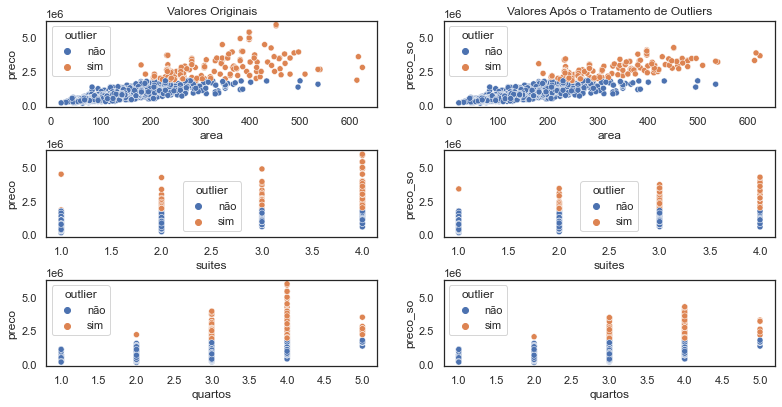

In [486]:
plt.figure()
ax1 = plt.subplot(321)
sns.scatterplot(y=Dados.preco, x=Dados.area, hue = Dados.outlier)
plt.title('Valores Originais')


ax2 = plt.subplot(322, sharey=ax1)
sns.scatterplot(y=Dados.preco_so, x=Dados.area, hue = Dados.outlier)
plt.title('Valores Após o Tratamento de Outliers')


ax3 = plt.subplot(323)
sns.scatterplot(y=Dados.preco, x=Dados.suites, hue = Dados.outlier)


ax4 = plt.subplot(324, sharey=ax3)
sns.scatterplot(y=Dados.preco_so, x=Dados.suites, hue = Dados.outlier)

ax5 = plt.subplot(325)
sns.scatterplot(y=Dados.preco, x=Dados.quartos, hue = Dados.outlier)

ax6 = plt.subplot(326, sharey=ax5)
sns.scatterplot(y=Dados.preco_so, x=Dados.quartos, hue = Dados.outlier)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.5)

plt.show()

In [487]:
#Criação do 2° modelo preliminar, utilizando a biblioteca statsmodel (melhoria no R²)
#(apenas com os atributos mais relevantes => Valor P < 0,05)
modelo_preliminar_2 = sm.ols(formula = 'preco_so ~ area + vagas + suites + População + \
                                        Area_bairro + Densidade_populacional + preco_metro', data = Dados)
modelo_preliminar_treinado_2 = modelo_preliminar_2.fit()
modelo_preliminar_treinado_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               preco_so   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 1.140e+04
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:14:44   Log-Likelihood:                -34412.
No. Observations:                2633   AIC:                         6.884e+04
Df Residuals:                    2625   BIC:                         6.889e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -6.856e+05   3.02e+04    -22.673      0.000   -7.45e+05   -6.26e+05
area                    5838.6602     50.420    115.800      0.000    5739.792    5937.528
vagas                  -1.217e+04   4534.780     -2.683      0.007   -2.11e+04   -3276.108
suites                  4.531e+04   4090.366     11.077      0.000    3.73e+04    5.33e+04
População                  6.9431      0.786      8.834      0.000       5.402       8.484
Area_bairro              -34.7359      4.311     -8.057      0.000     -43.190     -26.282
Densidade_populacional -4.332e+04   4275.381    -10.133      0.000   -5.17e+04   -3.49e+04
preco_metro              156.6427      1.575     99.478      0.000     153.555     159.730
==============================================================================
Omnibus:                     1213.879   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20142.180
Skew:                          -1.756   Prob(JB):                         0.00
Kurtosis:                      16.087   Cond. No.                     5.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [488]:
#Criação de cópia do dataframe para uso no dashboard
Dados_viz = Dados.copy()
Dados_viz.head()

,preco,area,quartos,banheiros,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro,preco_ajustado_mod_pre,preco_so,outlier
0,286000,63.00,2.0,2.0,1.0,1.0,portao,42038,2.4,5838,1.3,7.2,4539.682540,178688.066722,286000.0,não
1,328000,75.00,3.0,2.0,1.0,1.0,portao,42038,2.4,5838,1.3,7.2,4373.333333,223934.106039,328000.0,não
2,370000,62.77,2.0,2.0,2.0,1.0,portao,42038,2.4,5838,1.3,7.2,5894.535606,391521.325376,370000.0,não
3,295000,62.88,2.0,2.0,1.0,1.0,portao,42038,2.4,5838,1.3,7.2,4691.475827,207258.949286,295000.0,não
4,260000,75.00,3.0,2.0,1.0,1.0,portao,42038,2.4,5838,1.3,7.2,3466.666667,48655.790536,260000.0,não


## 4. Análise e Exploração dos Dados 

In [489]:
Dados.iloc[:,:10].describe()

,preco,area,quartos,banheiros,vagas,suites,População,População(%),Area_bairro
count,2.633000e+03,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000,2633.000000
mean,8.449052e+05,138.006251,2.984808,2.781618,1.960501,1.502848,37245.368781,2.114926,5761.985188
std,7.137591e+05,81.554500,0.717082,1.378767,0.919621,0.873936,9783.423061,0.535560,1763.752412
min,1.400000e+05,21.000000,1.000000,1.000000,1.000000,1.000000,24556.000000,1.400000,3310.000000
25%,4.200000e+05,80.880000,3.000000,2.000000,1.000000,1.000000,25493.000000,1.500000,4633.000000
50%,6.130000e+05,115.000000,3.000000,2.000000,2.000000,1.000000,39234.000000,2.200000,4850.000000
75%,9.800000e+05,168.830000,3.000000,4.000000,2.000000,2.000000,42038.000000,2.400000,8007.000000
max,5.990000e+06,625.000000,5.000000,7.000000,5.000000,4.000000,51461.000000,2.900000,8896.000000


In [490]:
Dados.iloc[:,10:].describe()

,Área(%),Densidade_populacional,preco_metro,preco_ajustado_mod_pre,preco_so
count,2633.000000,2633.00000,2633.000000,2.633000e+03,2.633000e+03
mean,1.310330,7.13646,5845.839158,8.449052e+05,8.293821e+05
std,0.383185,2.79391,1789.538744,6.891926e+05,6.431295e+05
min,0.800000,3.20000,2170.542636,-3.369280e+05,1.400000e+05
25%,1.100000,4.20000,4669.117647,3.788078e+05,4.200000e+05
50%,1.100000,7.20000,5569.620253,6.482572e+05,6.130000e+05
75%,1.800000,10.60000,6619.047619,1.100656e+06,9.800000e+05
max,2.000000,11.20000,16459.399823,4.277666e+06,4.277666e+06


Text(0.5, 0, 'Área')

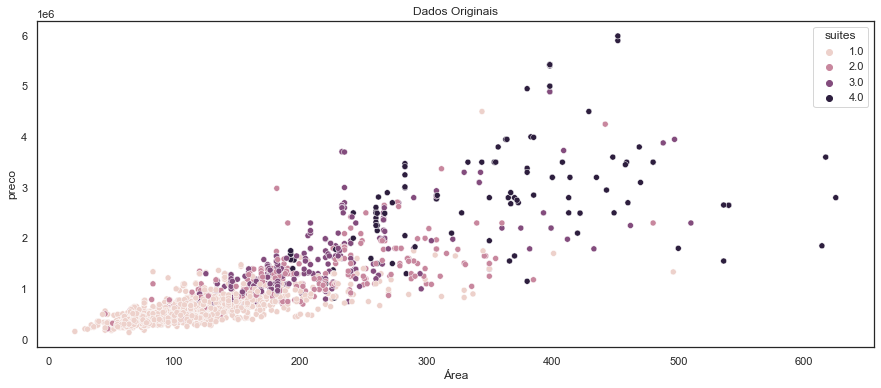

In [491]:
#Dispersão dos preços conforme aumenta o tamanho do apartamento.
plt.figure()
sns.scatterplot(Dados.area, Dados.preco, hue = Dados.suites)
plt.title('Dados Originais')
plt.xlabel('Área')

Text(0.5, 1.0, 'Preço x Quantidade de Quartos')

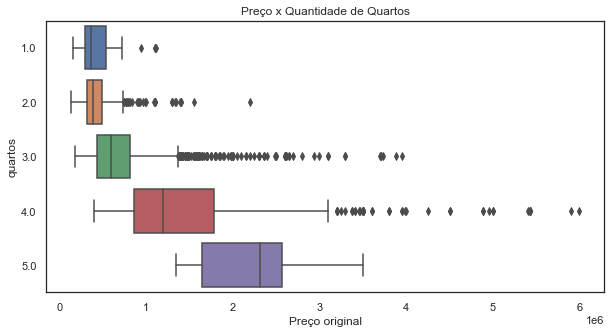

In [492]:
#Maior concentração de preços em apartamentos até três quartos
plt.figure(figsize = (10, 5))
sns.boxplot(x='preco',y='quartos',data = Dados, orient='h')
plt.xlabel('Preço original')
plt.title('Preço x Quantidade de Quartos')

<Figure size 1080x432 with 0 Axes>

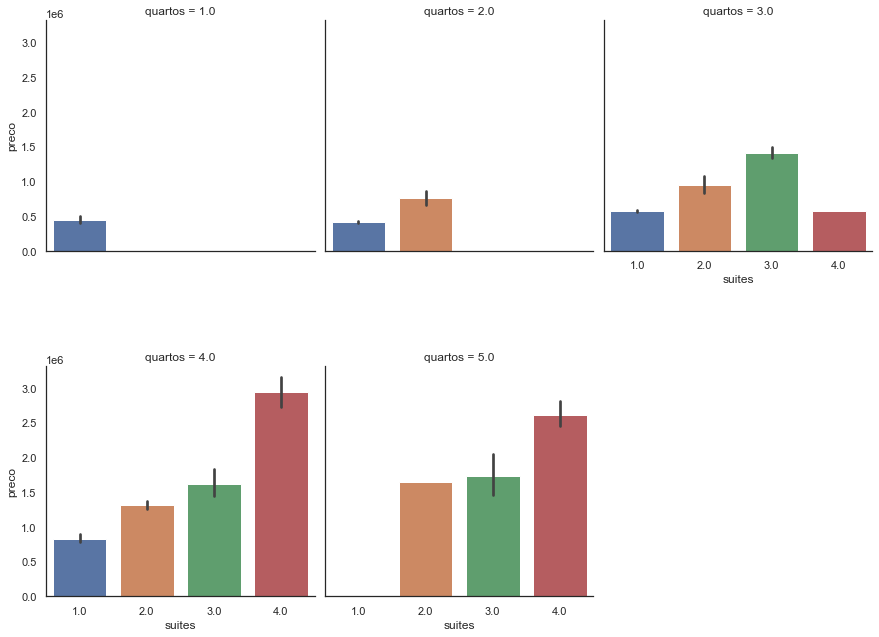

In [493]:
#Maior existência de outliers na variável preço para apartamentos com 3 ou mais suítes.
#Verificar unidades com mais suítes que quartos
plt.figure()
sns.catplot(x = 'suites', y='preco',data = Dados, col = 'quartos', col_wrap=3, kind='bar' ,orient='v')
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.5)



In [494]:
# Verificando quantidade de suítes maior que quartos (3 quartos => 4 suítes)
Dados.loc[(Dados['quartos']==3.0) & (Dados['suites']==4.0)]
#Dados[822:823]

,preco,area,quartos,banheiros,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro,preco_ajustado_mod_pre,preco_so,outlier
823,575000,110.0,3.0,1.0,1.0,4.0,agua-verde,51461,2.9,4850,1.1,10.6,5227.272727,665536.017879,575000.0,não


In [495]:
#Igualando a quantidade de suítes à quantidade de quartos
Dados.loc[(Dados['quartos']==3.0) & (Dados['suites']==4.0),'suites']=Dados.loc[(Dados['quartos']==3.0) & (Dados['suites']==4.0)]['quartos']
Dados.loc[(Dados['quartos']==3.0) & (Dados['suites']==4.0)]

,preco,area,quartos,banheiros,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro,preco_ajustado_mod_pre,preco_so,outlier


<Figure size 1080x432 with 0 Axes>

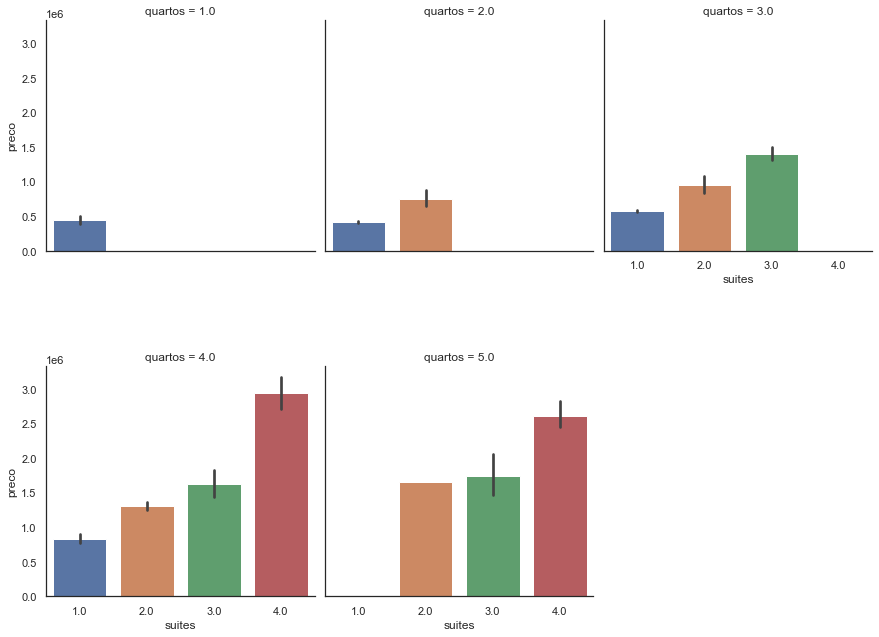

In [496]:
#Conferindo novamente o gráfico
plt.figure()
sns.catplot(x = 'suites', y='preco',data = Dados, col = 'quartos', col_wrap=3, kind='bar' ,orient='v', )
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.5)

<Figure size 1080x432 with 0 Axes>

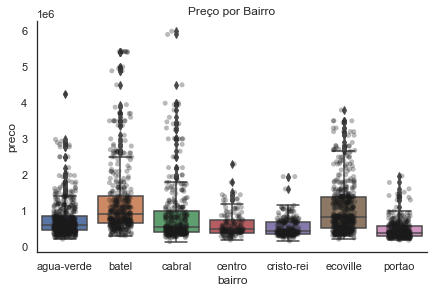

In [497]:
plt.figure()
sns.catplot(x='bairro', y = 'preco', kind = "box", data = Dados, height = 4, aspect = 1.5)
sns.stripplot(x = 'bairro', y = 'preco', data = Dados, alpha = 0.3, jitter = 0.2, color = 'k');
plt.title('Preço por Bairro')
plt.show()   

<Figure size 1080x432 with 0 Axes>

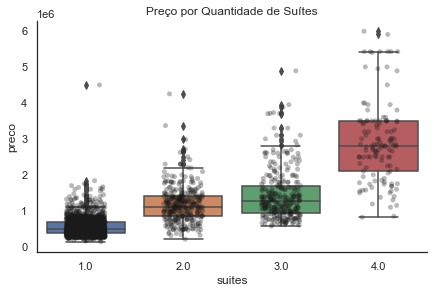

In [498]:
plt.figure()
sns.catplot(x='suites', y = 'preco', kind = "box", data = Dados, height = 4, aspect = 1.5)
sns.stripplot(x = 'suites', y = 'preco', data = Dados, alpha = 0.3, jitter = 0.2, color = 'k');
plt.title('Preço por Quantidade de Suítes')
plt.show()   

<Figure size 1080x432 with 0 Axes>

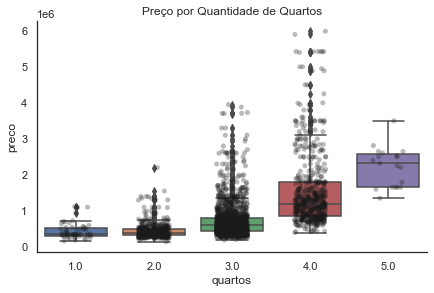

In [499]:
plt.figure()
sns.catplot(x='quartos', y = 'preco', kind = "box", data = Dados, height = 4, aspect = 1.5)
sns.stripplot(x = 'quartos', y = 'preco', data = Dados, alpha = 0.3, jitter = 0.2, color = 'k');
plt.title('Preço por Quantidade de Quartos')
plt.show()   

In [500]:
# Comparando quantidade de suítes por quartos
Dados.pivot_table(values='preco', index=['suites'], columns=['quartos'], aggfunc=np.count_nonzero)


quartos,1.0,2.0,3.0,4.0,5.0
suites,,,,,
1.0,54.0,468.0,1193.0,146.0,NaN
2.0,NaN,48.0,52.0,240.0,4.0
3.0,NaN,NaN,253.0,48.0,4.0
4.0,NaN,NaN,NaN,112.0,11.0


<Figure size 1080x432 with 0 Axes>

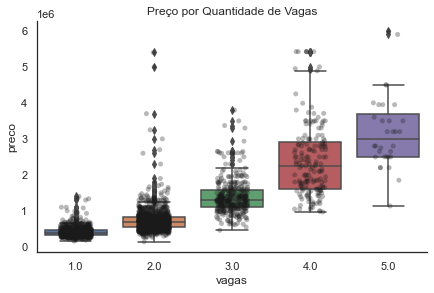

In [501]:
plt.figure()
sns.catplot(x='vagas', y = 'preco', kind = "box", data = Dados, height = 4, aspect = 1.5)
sns.stripplot(x = 'vagas', y = 'preco', data = Dados, alpha = 0.3, jitter = 0.2, color = 'k');
plt.title('Preço por Quantidade de Vagas')
plt.show()   

<Figure size 1080x432 with 0 Axes>

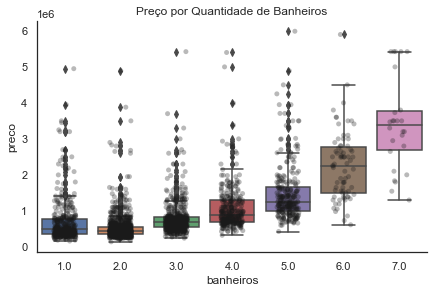

In [502]:
plt.figure()
sns.catplot(x='banheiros', y = 'preco', kind = "box", data = Dados, height = 4, aspect = 1.5)
sns.stripplot(x = 'banheiros', y = 'preco', data = Dados, alpha = 0.3, jitter = 0.2, color = 'k');
plt.title('Preço por Quantidade de Banheiros')
plt.show()   

In [503]:
# Comparando, quantidade de suítes, quartos e banheiros 
Dados.pivot_table(values='preco', index=['banheiros'], columns=['quartos','suites'], aggfunc=np.count_nonzero)


quartos     1.0    2.0          3.0                4.0                    5.0  \
suites      1.0    1.0   2.0    1.0   2.0    3.0   1.0   2.0   3.0   4.0  2.0   
banheiros                                                                       
1.0        34.0  113.0   4.0  171.0   3.0   18.0  13.0  34.0   7.0  11.0  NaN   
2.0        19.0  331.0  14.0  545.0   7.0    4.0  24.0  17.0   2.0   5.0  1.0   
3.0         1.0   22.0  17.0  366.0  25.0   27.0  54.0  27.0   5.0   1.0  3.0   
4.0         NaN    2.0  10.0  107.0  12.0   62.0  50.0  56.0  11.0  21.0  NaN   
5.0         NaN    NaN   3.0    4.0   5.0  119.0   4.0  95.0  18.0  22.0  NaN   
6.0         NaN    NaN   NaN    NaN   NaN   20.0   1.0   9.0   5.0  33.0  NaN   
7.0         NaN    NaN   NaN    NaN   NaN    3.0   NaN   2.0   NaN  19.0  NaN   

quartos              
suites     3.0  4.0  
banheiros            
1.0        NaN  NaN  
2.0        NaN  1.0  
3.0        NaN  NaN  
4.0        NaN  NaN  
5.0        3.0  1.0  
6.0        1.0  7.0  
7.0        NaN  2.0

In [504]:
Dados.columns

Index(['preco', 'area', 'quartos', 'banheiros', 'vagas', 'suites', 'bairro',
       'População', 'População(%)', 'Area_bairro', 'Área(%)',
       'Densidade_populacional', 'preco_metro', 'preco_ajustado_mod_pre',
       'preco_so', 'outlier'],
      dtype='object')

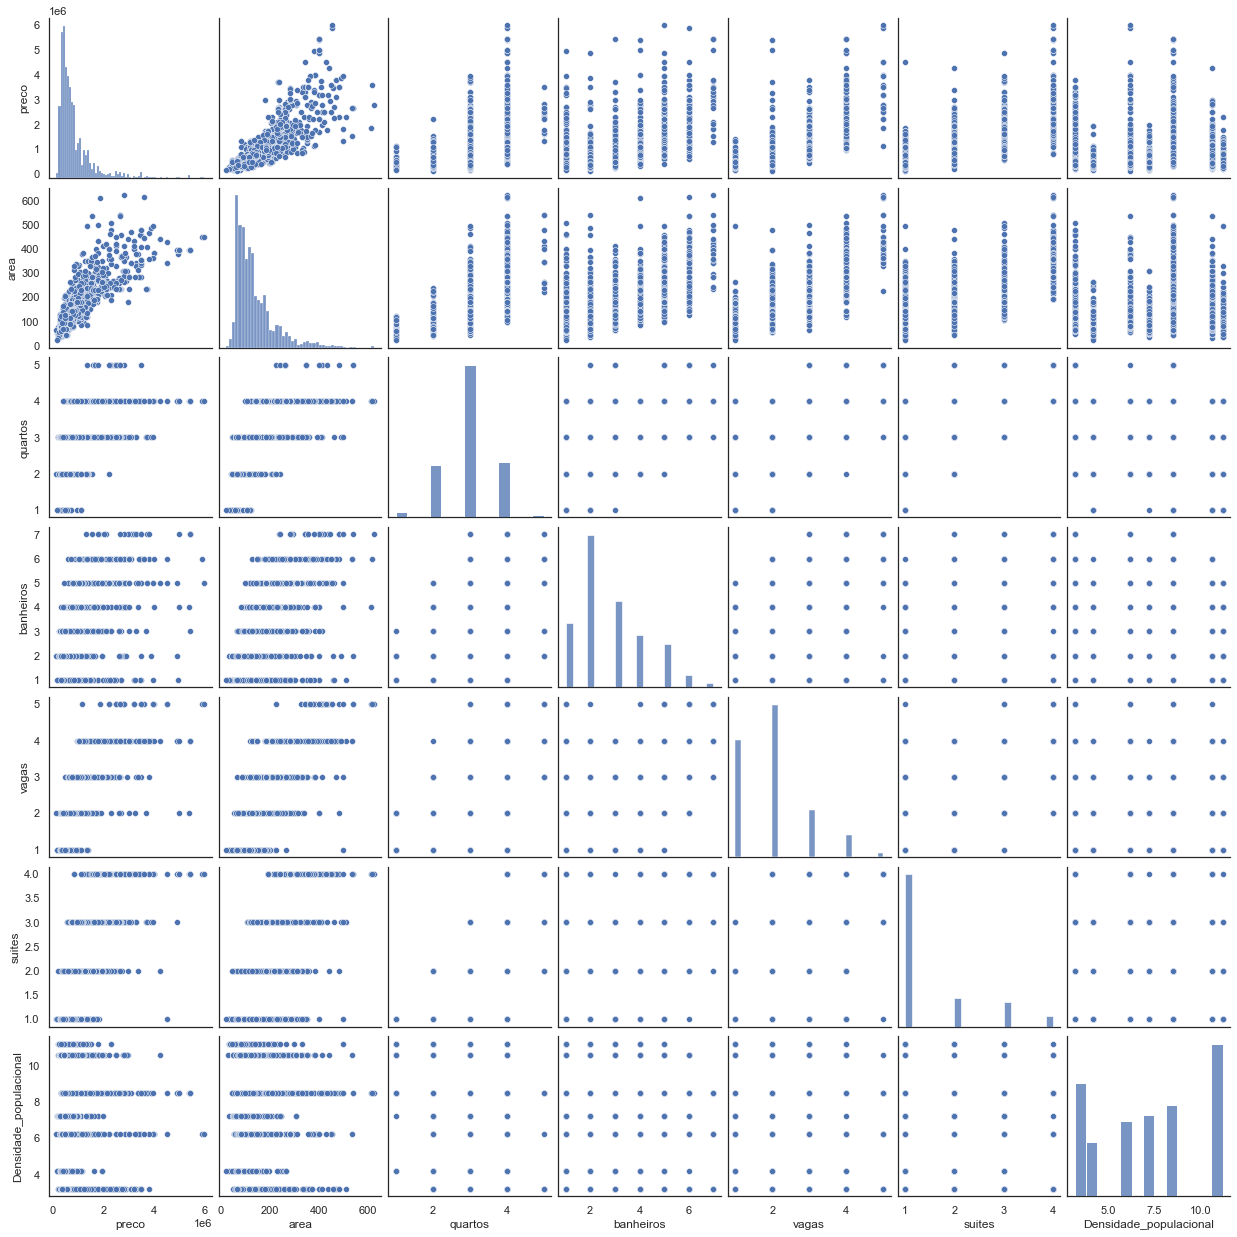

In [505]:
sns.pairplot(Dados[['preco', 'area', 'quartos', 'banheiros', 'vagas', 'suites', 'Densidade_populacional']])
plt.show()

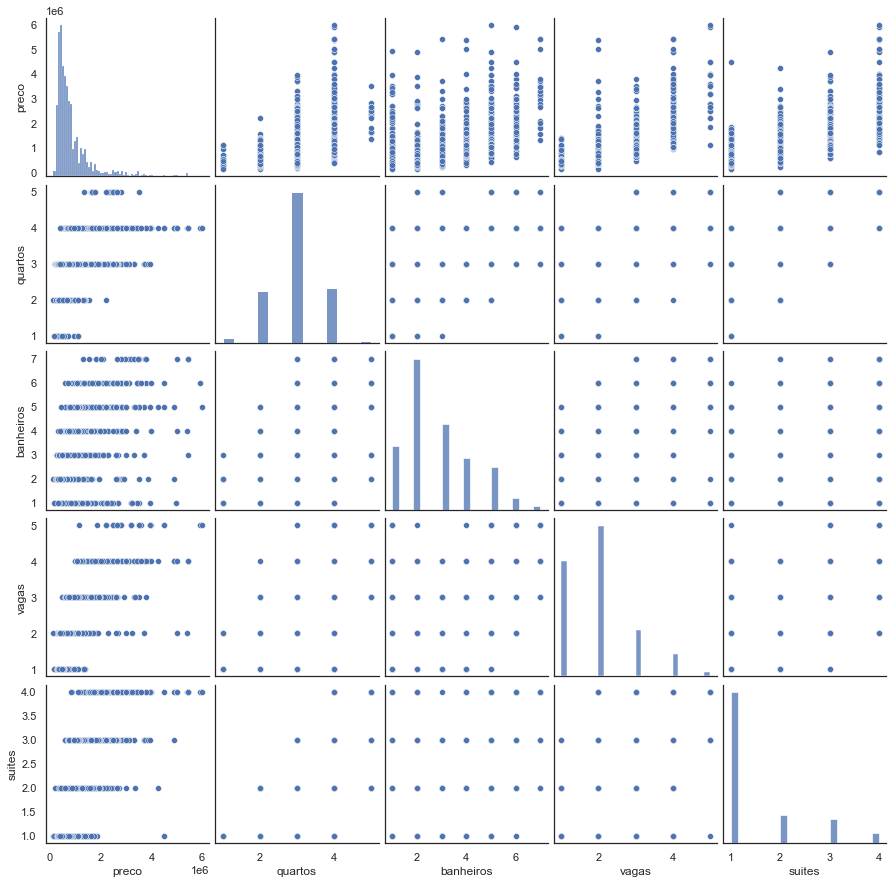

In [506]:
sns.pairplot(Dados[['preco', 'quartos', 'banheiros', 'vagas', 'suites']])
plt.show()

## 4.1 Análise da correlação entre atributos

<AxesSubplot:>

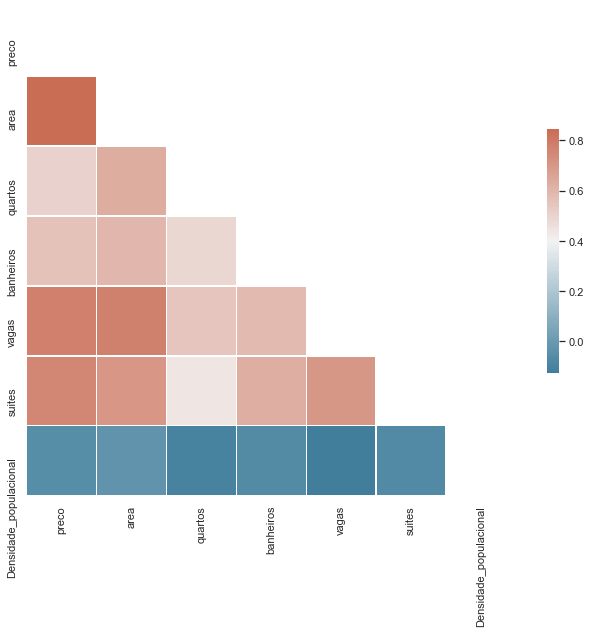

In [507]:
#Gráfico das correlações entre as features/variáveis/colunas
#Source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt

sns.set_theme(style = "white")

d = Dados[['preco', 'area', 'quartos', 'banheiros', 'vagas', 'suites', 'Densidade_populacional']]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0.4,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [508]:
d.corr()

,preco,area,quartos,banheiros,vagas,suites,Densidade_populacional
preco,1.000000,0.846866,0.506918,0.564747,0.781479,0.755345,-0.058115
area,0.846866,1.000000,0.630357,0.594166,0.777294,0.708096,-0.027909
quartos,0.506918,0.630357,1.000000,0.487376,0.551618,0.445504,-0.102585
banheiros,0.564747,0.594166,0.487376,1.000000,0.585902,0.628074,-0.064892
vagas,0.781479,0.777294,0.551618,0.585902,1.000000,0.700004,-0.128179
suites,0.755345,0.708096,0.445504,0.628074,0.700004,1.000000,-0.067247
Densidade_populacional,-0.058115,-0.027909,-0.102585,-0.064892,-0.128179,-0.067247,1.000000


## 4.2 Tratamento da dupla contagem de quartos nas suítes

In [509]:
# Comparando, quantidade de suítes e quartos
Dados.pivot_table(values='preco', index=['quartos'], columns=['suites'], aggfunc=np.count_nonzero)


suites,1.0,2.0,3.0,4.0
quartos,,,,
1.0,54.0,NaN,NaN,NaN
2.0,468.0,48.0,NaN,NaN
3.0,1193.0,52.0,253.0,NaN
4.0,146.0,240.0,48.0,112.0
5.0,NaN,4.0,4.0,11.0


In [510]:
#ajustando o dataset para retirar o número de suítes do número de quartos em função da contagem em duplicidade
Dados['quartos']=Dados['quartos']-Dados['suites']
Dados.head()


,preco,area,quartos,banheiros,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro,preco_ajustado_mod_pre,preco_so,outlier
0,286000,63.00,1.0,2.0,1.0,1.0,portao,42038,2.4,5838,1.3,7.2,4539.682540,178688.066722,286000.0,não
1,328000,75.00,2.0,2.0,1.0,1.0,portao,42038,2.4,5838,1.3,7.2,4373.333333,223934.106039,328000.0,não
2,370000,62.77,1.0,2.0,2.0,1.0,portao,42038,2.4,5838,1.3,7.2,5894.535606,391521.325376,370000.0,não
3,295000,62.88,1.0,2.0,1.0,1.0,portao,42038,2.4,5838,1.3,7.2,4691.475827,207258.949286,295000.0,não
4,260000,75.00,2.0,2.0,1.0,1.0,portao,42038,2.4,5838,1.3,7.2,3466.666667,48655.790536,260000.0,não


In [511]:
# Comparando, quantidade de suítes e quartos 
Dados.pivot_table(values='preco', index=['quartos'], columns=['suites'], aggfunc=np.count_nonzero)


suites,1.0,2.0,3.0,4.0
quartos,,,,
0.0,54.0,48.0,253.0,112.0
1.0,468.0,52.0,48.0,11.0
2.0,1193.0,240.0,4.0,NaN
3.0,146.0,4.0,NaN,NaN


<AxesSubplot:>

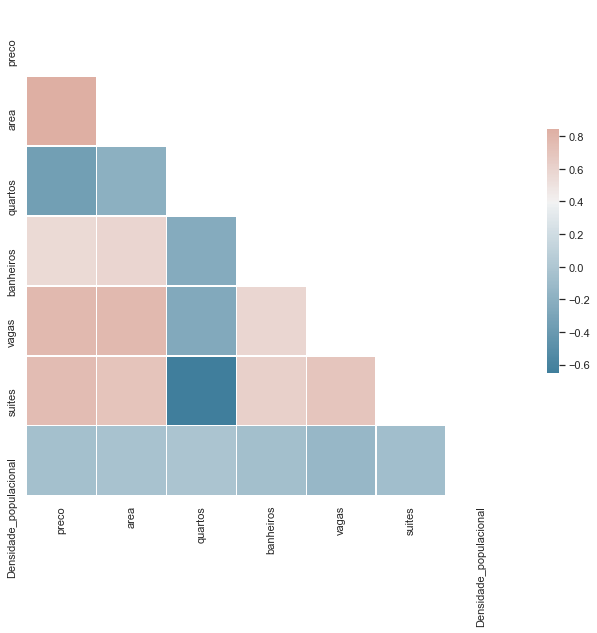

In [512]:
#Gráfico das correlações entre as features/variáveis/colunas
#Source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt

sns.set_theme(style = "white")

d = Dados[['preco', 'area', 'quartos', 'banheiros', 'vagas', 'suites', 'Densidade_populacional']]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0.4,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [513]:
#A correlação entre suítes/quartos é reduzida em função das alterações acima.
#Agora quartos e suítes são inversamente proporcionais, ou seja, aumentando o número de suítes diminui o de quartos
d.corr()

,preco,area,quartos,banheiros,vagas,suites,Densidade_populacional
preco,1.000000,0.846866,-0.349132,0.564747,0.781479,0.755345,-0.058115
area,0.846866,1.000000,-0.196053,0.594166,0.777294,0.708096,-0.027909
quartos,-0.349132,-0.196053,1.000000,-0.234585,-0.254324,-0.653052,-0.017518
banheiros,0.564747,0.594166,-0.234585,1.000000,0.585902,0.628074,-0.064892
vagas,0.781479,0.777294,-0.254324,0.585902,1.000000,0.700004,-0.128179
suites,0.755345,0.708096,-0.653052,0.628074,0.700004,1.000000,-0.067247
Densidade_populacional,-0.058115,-0.027909,-0.017518,-0.064892,-0.128179,-0.067247,1.000000


# 5. Modelagem

## 5.1 Ordinary Least Squares (biblioteca Statsmodel)

In [514]:
Dados.columns

Index(['preco', 'area', 'quartos', 'banheiros', 'vagas', 'suites', 'bairro',
       'População', 'População(%)', 'Area_bairro', 'Área(%)',
       'Densidade_populacional', 'preco_metro', 'preco_ajustado_mod_pre',
       'preco_so', 'outlier'],
      dtype='object')

In [515]:
#Criando uma cópia do dataset
Dados_copy = Dados

In [516]:
Dados_copy.dtypes

preco                        int64
area                       float64
quartos                    float64
banheiros                  float64
vagas                      float64
suites                     float64
bairro                    category
População                    int64
População(%)               float64
Area_bairro                  int64
Área(%)                    float64
Densidade_populacional     float64
preco_metro                float64
preco_ajustado_mod_pre     float64
preco_so                   float64
outlier                     object
dtype: object

In [517]:
#Convertendo a coluna bairro para inteiros
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Dados_copy['bairro'] = labelencoder.fit_transform(Dados_copy['bairro'])
Dados_copy.dtypes

preco                       int64
area                      float64
quartos                   float64
banheiros                 float64
vagas                     float64
suites                    float64
bairro                      int32
População                   int64
População(%)              float64
Area_bairro                 int64
Área(%)                   float64
Densidade_populacional    float64
preco_metro               float64
preco_ajustado_mod_pre    float64
preco_so                  float64
outlier                    object
dtype: object

In [518]:
#Criação do modelo 1 utilizando a biblioteca statsmodel
#(apenas com os atributos mais relevantes => Valor P < 0,05)
import statsmodels.formula.api as sm
modelo_1 = sm.ols(formula = 'preco_so ~ area + quartos + banheiros + vagas + suites + bairro + População + Area_bairro '
                  '+ Densidade_populacional + preco_metro', data = Dados_copy)
modelo_1_treinado = modelo_1.fit()
modelo_1_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               preco_so   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     8068.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:15:15   Log-Likelihood:                -34396.
No. Observations:                2633   AIC:                         6.881e+04
Df Residuals:                    2622   BIC:                         6.888e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -7.603e+05   3.43e+04    -22.169      0.000   -8.28e+05   -6.93e+05
area                    5827.5614     53.483    108.960      0.000    5722.688    5932.435
quartos                 1.285e+04   4211.111      3.052      0.002    4594.399    2.11e+04
banheiros              -6128.2527   2218.037     -2.763      0.006   -1.05e+04   -1778.972
vagas                  -1.189e+04   4610.098     -2.580      0.010   -2.09e+04   -2853.173
suites                  6.051e+04   6180.281      9.791      0.000    4.84e+04    7.26e+04
bairro                  6265.7577   1504.917      4.164      0.000    3314.812    9216.703
População                  6.6960      0.785      8.532      0.000       5.157       8.235
Area_bairro              -34.3585      4.312     -7.969      0.000     -42.813     -25.904
Densidade_populacional -3.875e+04   4346.623     -8.915      0.000   -4.73e+04   -3.02e+04
preco_metro              157.9197      1.597     98.911      0.000     154.789     161.050
==============================================================================
Omnibus:                     1209.736   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19800.777
Skew:                          -1.752   Prob(JB):                         0.00
Kurtosis:                      15.969   Cond. No.                     6.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 5.2 Ordinary Least Squares (biblioteca Sklearn)

In [519]:
Dados.columns

Index(['preco', 'area', 'quartos', 'banheiros', 'vagas', 'suites', 'bairro',
       'População', 'População(%)', 'Area_bairro', 'Área(%)',
       'Densidade_populacional', 'preco_metro', 'preco_ajustado_mod_pre',
       'preco_so', 'outlier'],
      dtype='object')

In [520]:
X_Dados = Dados.drop(columns = ['preco','preco_ajustado_mod_pre', 'outlier', 'preco_so',
                                'População(%)','Área(%)'], axis = 1) # todas as variáveis/atributos, exceto 'preco_so'
y_Dados = Dados['preco_so'] # variável-target

In [521]:
labelencoder = LabelEncoder()
X_Dados['bairro'] = labelencoder.fit_transform(X_Dados['bairro'])

X_Dados

,area,quartos,banheiros,vagas,suites,bairro,População,Area_bairro,Densidade_populacional,preco_metro
0,63.00,1.0,2.0,1.0,1.0,6,42038,5838,7.2,4539.682540
1,75.00,2.0,2.0,1.0,1.0,6,42038,5838,7.2,4373.333333
2,62.77,1.0,2.0,2.0,1.0,6,42038,5838,7.2,5894.535606
3,62.88,1.0,2.0,1.0,1.0,6,42038,5838,7.2,4691.475827
4,75.00,2.0,2.0,1.0,1.0,6,42038,5838,7.2,3466.666667
...,...,...,...,...,...,...,...,...,...,...
4463,95.00,2.0,3.0,1.0,1.0,4,37565,8896,4.2,3578.947368
4465,114.00,2.0,3.0,1.0,1.0,4,37565,8896,4.2,4122.807018
4467,125.00,2.0,3.0,2.0,1.0,4,37565,8896,4.2,3880.000000
4468,68.00,2.0,2.0,2.0,1.0,4,37565,8896,4.2,5588.235294


In [522]:
# Definindo os dataframes de treinamento e teste:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_Dados, 
                                                                  y_Dados, 
                                                                  test_size = 0.2, 
                                                                  random_state = 2208)
print(f"Dataframe de treinamento: {X_treinamento.shape[0]} linhas")
print(f"Dataframe de teste......: {X_teste.shape[0]} linhas")

Dataframe de treinamento: 2106 linhas
Dataframe de teste......: 527 linhas


In [523]:
#Importa a biblioteca e instancia o objeto
from sklearn.linear_model import LinearRegression
modelo_2 = LinearRegression()

In [524]:
# Treina o modelo usando as amostras/dataset de treinamento: X_treinamento e y_treinamento 
modelo_2.fit(X_treinamento, y_treinamento)

LinearRegression()

In [525]:
# Valor do intercepto
modelo_2.intercept_

-740639.1685913978

In [526]:
# Coeficientes do modelo de Regressão Linear
coeficientes_regressao_linear = pd.DataFrame([X_treinamento.columns, modelo_2.coef_]).T
coeficientes_regressao_linear = coeficientes_regressao_linear.rename(columns={0: 'Feature/variável/coluna', 1: 'Coeficientes'})
coeficientes_regressao_linear

,Feature/variável/coluna,Coeficientes
0,area,5845.5
1,quartos,10375.8
2,banheiros,-3720.08
3,vagas,-13704.8
4,suites,53349
5,bairro,5905.51
6,População,6.82118
7,Area_bairro,-36.5169
8,Densidade_populacional,-39976.9
9,preco_metro,159.237


In [527]:
# Score (R²)
print('Score com dados de treinamento: %f.\nScore com dados de teste: %f'% 
      (modelo_2.score(X_treinamento,y_treinamento),modelo_2.score(X_teste,y_teste)))

Score com dados de treinamento: 0.969192.
Score com dados de teste: 0.965579


## 5.3 Regularized Regression Methods - Ridge Regression (biblioteca Sklearn)

In [528]:
#Importação da biblioteca e criação do modelo e definição do valor de alpha
from sklearn.linear_model import Ridge
modelo_3 = Ridge(alpha = 0.1) 

In [529]:
#Treinamento do modelo
modelo_3.fit(X_treinamento, y_treinamento)

Ridge(alpha=0.1)

In [530]:
# Lista das variáveis + coeficientes da Ridge:
list(zip(X_treinamento.columns, (modelo_3.coef_)))

[('area', 5845.5476464823205),
 ('quartos', 10365.005068931343),
 ('banheiros', -3717.577295054702),
 ('vagas', -13698.661091137763),
 ('suites', 53328.49200301114),
 ('bairro', 5905.906559658098),
 ('População', 6.820310185993782),
 ('Area_bairro', -36.512587358649256),
 ('Densidade_populacional', -39971.99137569031),
 ('preco_metro', 159.23713249102354)]

In [531]:
print('Score com dados de treinamento: %f.\nScore com dados de teste: %f'% 
      (modelo_3.score(X_treinamento,y_treinamento),modelo_3.score(X_teste,y_teste)))

Score com dados de treinamento: 0.969192.
Score com dados de teste: 0.965579


In [532]:
#Utilizando GridSearchCV para busca do melhor alpha
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[.00001,.0001,.001,.01,.1,1,10,100,1000]}
modelo_3_1 = Ridge()
modelo_3_1 = GridSearchCV(modelo_3_1, parameters, scoring='r2', cv=10)
modelo_3_1.fit(X_treinamento,y_treinamento)



GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000]},
             scoring='r2')

In [533]:
modelo_3_1.best_params_

{'alpha': 10}

In [534]:
modelo_3_1.best_score_

0.96772802546756

In [535]:
print('Score com dados de treinamento: %f.\nScore com dados de teste: %f'% 
      (modelo_3_1.score(X_treinamento,y_treinamento),modelo_3_1.score(X_teste,y_teste)))

Score com dados de treinamento: 0.969190.
Score com dados de teste: 0.965540


## 5.4 LASSO - Least Absolute Shrinkage And Selection Operator regularization (biblioteca Sklearn)

In [536]:
#Importação da biblioteca, criação do modelo e definição do valor de alpha
from sklearn.linear_model import Lasso
modelo_4 = Lasso(alpha = .1)

In [537]:
#Treinamento do modelo
modelo_4.fit(X_treinamento, y_treinamento)

Lasso(alpha=0.1)

In [538]:
# Lista das variáveis + coeficientes do Lasso:
list(zip(X_treinamento.columns, (modelo_4.coef_)))

[('area', 5845.496519602181),
 ('quartos', 10375.064912830696),
 ('banheiros', -3719.8808892022826),
 ('vagas', -13704.256937925184),
 ('suites', 53347.70457022557),
 ('bairro', 5905.492226675107),
 ('População', 6.821134879185218),
 ('Area_bairro', -36.51670670540579),
 ('Densidade_populacional', -39976.65271883965),
 ('preco_metro', 159.23731757457307)]

In [539]:
print('Score com dados de treinamento: %f.\nScore com dados de teste: %f'% 
      (modelo_4.score(X_treinamento,y_treinamento),modelo_4.score(X_teste,y_teste)))

Score com dados de treinamento: 0.969192.
Score com dados de teste: 0.965579


In [540]:
#Utilizando GridSearch e Cross-Validation para busca do melhor alpha
parameters = {'alpha':[.00001,.0001,.001,.01,.1,1,10,100,1000]}
modelo_4_1 = Lasso()
modelo_4_1 = GridSearchCV(modelo_4_1, parameters, scoring='r2', cv=10)
modelo_4_1.fit(X_treinamento,y_treinamento)



GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000]},
             scoring='r2')

In [541]:
print('Melhores parâmetros:')
modelo_4_1.best_params_

Melhores parâmetros:


{'alpha': 100}

In [542]:
print('Melhor score:')
modelo_4_1.best_score_

Melhor score:


0.9677224672360367

In [543]:
print('Score com dados de treinamento: %f.\nScore com dados de teste: %f'% 
      (modelo_4_1.score(X_treinamento,y_treinamento),modelo_4_1.score(X_teste,y_teste)))

Score com dados de treinamento: 0.969191.
Score com dados de teste: 0.965556


## 5.5 Elastic Net (biblioteca Sklearn)

In [544]:
#Importa a biblioteca e instancia o objeto
from sklearn.linear_model import ElasticNet
modelo_5 = ElasticNet(alpha=.1, l1_ratio=1)

In [545]:
#Treinamento do modelo
modelo_5.fit(X_treinamento, y_treinamento)

ElasticNet(alpha=0.1, l1_ratio=1)

In [546]:
list(zip(X_treinamento,modelo_5.coef_))

[('area', 5845.496519602181),
 ('quartos', 10375.064912830696),
 ('banheiros', -3719.8808892022826),
 ('vagas', -13704.256937925184),
 ('suites', 53347.70457022557),
 ('bairro', 5905.492226675107),
 ('População', 6.821134879185218),
 ('Area_bairro', -36.51670670540579),
 ('Densidade_populacional', -39976.65271883965),
 ('preco_metro', 159.23731757457307)]

In [547]:
print('Score com dados de treinamento: %f.\nScore com dados de teste: %f'% 
      (modelo_5.score(X_treinamento,y_treinamento),modelo_5.score(X_teste,y_teste)))

Score com dados de treinamento: 0.969192.
Score com dados de teste: 0.965579


In [548]:
np.logspace(-10, 10, 15)

array([1.00000000e-10, 2.68269580e-09, 7.19685673e-08, 1.93069773e-06,
       5.17947468e-05, 1.38949549e-03, 3.72759372e-02, 1.00000000e+00,
       2.68269580e+01, 7.19685673e+02, 1.93069773e+04, 5.17947468e+05,
       1.38949549e+07, 3.72759372e+08, 1.00000000e+10])

In [549]:
#Utilizando GridSearch e Cross-Validation para busca dos melhores parâmetros
en = ElasticNet()

# Otimização dos hiperparâmetros:
d_hiperparametros = {'alpha': [.00001,.0001,.001,.01,.1,1,10,100,1000], 
                     'l1_ratio': [.00001,.0001,.001,.01,.1,1,10,100,1000]}

modelo_5_1 = GridSearchCV(estimator = en, # Elastic Net
                      param_grid = d_hiperparametros, # Dicionário com os hiperparâmetros
                      scoring = 'r2',
                      n_jobs = -1, # Usar todos os processadores/computação
                      refit = True, 
                      cv = 10) # Número de Cross-Valitations

In [550]:
modelo_5_1.fit(X_treinamento,y_treinamento)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000],
                         'l1_ratio': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                      100, 1000]},
             scoring='r2')

In [551]:
modelo_5_1.best_params_

{'alpha': 0.01, 'l1_ratio': 1e-05}

In [552]:
modelo_5_1.best_score_

0.9677309593760455

In [553]:
print('Score com dados de treinamento: %f.\nScore com dados de teste: %f'% 
      (modelo_5_1.score(X_treinamento,y_treinamento),modelo_5_1.score(X_teste,y_teste)))

Score com dados de treinamento: 0.969185.
Score com dados de teste: 0.965497


## 5.6 Support Vector Regression  (SVM-LinearSVR - biblioteca Sklearn)

In [554]:
#Importa a biblioteca e instancia o objeto
from sklearn.svm import LinearSVR
modelo_6 = LinearSVR(random_state=0, C=1, tol=1e-2, epsilon=0.1)

In [555]:
#Treinamento do modelo
modelo_6.fit(X_treinamento, y_treinamento)

LinearSVR(C=1, epsilon=0.1, random_state=0, tol=0.01)

In [556]:
print('Score com dados de treinamento: %f.\nScore com dados de teste: %f'% 
      (modelo_6.score(X_treinamento,y_treinamento),modelo_6.score(X_teste,y_teste)))

Score com dados de treinamento: 0.915462.
Score com dados de teste: 0.908700


In [557]:
#Utilizando GridSearch e Cross-Validation para busca dos melhores parâmetros
svr = LinearSVR()

# Otimização dos hiperparâmetros:
d_hiperparametros = {'C': [.00001,.0001,.001,.01,.1,1,10,100,1000], 
                     'tol': [.00001,.0001,.001,.01,.1,1,10,100,1000],
                    'epsilon': [.00001,.0001,.001,.01,.1,1,10,100,1000]}

modelo_6_1 = GridSearchCV(estimator = svr, # Suppot Vector Regressor
                      param_grid = d_hiperparametros, # Dicionário com os hiperparâmetros
                      scoring = 'r2',
                      n_jobs = -1, # Usar todos os processadores/computação
                      refit = True, 
                      cv = 10) # Número de Cross-Valitations

In [558]:
modelo_6_1.fit(X_treinamento,y_treinamento)

GridSearchCV(cv=10, estimator=LinearSVR(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000],
                         'epsilon': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                     100, 1000],
                         'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                 1000]},
             scoring='r2')

In [559]:
modelo_6_1.best_params_

{'C': 10, 'epsilon': 1, 'tol': 0.001}

In [560]:
modelo_6_1.best_score_

0.9126983274761704

In [561]:
print('Score com dados de treinamento: %f.\nScore com dados de teste: %f'% 
      (modelo_6_1.score(X_treinamento,y_treinamento),modelo_6_1.score(X_teste,y_teste)))

Score com dados de treinamento: 0.561625.
Score com dados de teste: 0.573647


## 5.7 Stochastic Gradient Descent Regressor  (SGDRegressor - biblioteca Sklearn)

In [562]:
#importando as bibliotecas
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# intanciando o objeto com a criação de pipeline, padronização das variáveis preditoras e treinamento do modelo  
modelo_7 = make_pipeline(StandardScaler(),SGDRegressor(penalty='elasticnet', max_iter=1000, tol=1e-3))
modelo_7.fit(X_treinamento, y_treinamento)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(penalty='elasticnet'))])

In [563]:
print('Score com dados de treinamento: %f.\nScore com dados de teste: %f'% 
      (modelo_7.score(X_treinamento,y_treinamento),modelo_7.score(X_teste,y_teste)))

Score com dados de treinamento: 0.968800.
Score com dados de teste: 0.965496


In [564]:
#Utilizando GridSearch e Cross-Validation para busca dos melhores parâmetros
sgd = SGDRegressor()

# Otimização dos hiperparâmetros:
d_hiperparametros = {'penalty': ['l2','l1','elasticnet'], 
                    'alpha': [.00001,.0001,.001,.01,.1,1,10,100,1000],
                    'l1_ratio':[.00001,.0001,.001,.01,.1,1]}

modelo_7_1 = GridSearchCV(estimator = sgd, # SGDRegressor
                      param_grid = d_hiperparametros, # Dicionário com os hiperparâmetros
                      scoring = 'r2',
                      n_jobs = -1, # Usar todos os processadores/computação
                      cv = 10) # Número de Cross-Valitations

In [565]:
# intanciando o objeto com a criação de pipeline, padronização das variáveis preditoras e treinamento do modelo  
pipeline = make_pipeline(StandardScaler(),modelo_7_1)
pipeline.fit(X_treinamento, y_treinamento)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=10, estimator=SGDRegressor(), n_jobs=-1,
                              param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                    0.1, 1, 10, 100, 1000],
                                          'l1_ratio': [1e-05, 0.0001, 0.001,
                                                       0.01, 0.1, 1],
                                          'penalty': ['l2', 'l1',
                                                      'elasticnet']},
                              scoring='r2'))])

In [566]:
modelo_7_1.best_params_

{'alpha': 1e-05, 'l1_ratio': 1e-05, 'penalty': 'l1'}

In [567]:
modelo_7_1.best_score_

0.9677033520912419

In [568]:
#Padronização das variáveis preditoras de treinamento e teste por necessidade do algoritmo
SS = StandardScaler()
SSTrein = SS.fit_transform(X_treinamento, y=y_treinamento)
SSTest = SS.fit_transform(X_teste, y=y_teste)

In [569]:
#Instancia o objeto (criação do modelo com os melhores parâmetros)
modelo_7_2 = SGDRegressor(alpha= 0.1, l1_ratio= 0.0001, penalty= 'l1')

In [570]:
#Ajuste do modelo
modelo_7_2.fit(SSTrein, y_treinamento)

SGDRegressor(alpha=0.1, l1_ratio=0.0001, penalty='l1')

In [571]:
print('Score com dados de treinamento: %f.\nScore com dados de teste: %f'% 
      (modelo_7_2.score(SSTrein,y_treinamento),modelo_7_2.score(SSTest,y_teste)))

Score com dados de treinamento: 0.969076.
Score com dados de teste: 0.962077


## 6.2 Apresentação dos Resultados - Comparativo dos modelos

In [572]:
#Comparativo dos Coeficientes
Coeficientes = pd.DataFrame(data=list(zip(X_treinamento,modelo_1_treinado.params[1:],modelo_2.coef_,
                                          modelo_3.coef_,modelo_4.coef_,modelo_5.coef_,modelo_6.coef_,modelo_7_2.coef_),),)
Coeficientes.columns=['Atributo','OLS - Statsmodel','OLS - Sklearn', 'Ridge','LASSO','ElasticNet','SVR','SGDRegressor']
Coeficientes

,Atributo,OLS - Statsmodel,OLS - Sklearn,Ridge,LASSO,ElasticNet,SVR,SGDRegressor
0,area,5827.561381,5845.495818,5845.547646,5845.496520,5845.496520,5891.327686,477613.375130
1,quartos,12851.837396,10375.848203,10365.005069,10375.064913,10375.064913,-127.404998,10695.693381
2,banheiros,-6128.252698,-3720.083338,-3717.577295,-3719.880889,-3719.880889,43.100127,-5862.644601
3,vagas,-11892.973319,-13704.846513,-13698.661091,-13704.256938,-13704.256938,50.141509,-11874.762466
4,suites,60513.987366,53348.950632,53328.492003,53347.704570,53347.704570,73.484069,48573.484508
5,bairro,6265.757746,5905.511657,5905.906560,5905.492227,5905.492227,-44.221628,14325.249062
6,População,6.696014,6.821183,6.820310,6.821135,6.821135,-8.744598,44679.924547
7,Area_bairro,-34.358526,-36.516945,-36.512587,-36.516707,-36.516707,-45.795687,-42600.061905
8,Densidade_populacional,-38751.127201,-39976.906364,-39971.991376,-39976.652719,-39976.652719,-210.108435,-75595.355281
9,preco_metro,157.919725,159.237398,159.237132,159.237318,159.237318,117.489100,279080.895815


In [573]:
#Comparativo dos Scores
Scores = pd.DataFrame(data=[('OLS - Statsmodel',modelo_1_treinado.rsquared,0),
                            ('OLS - Sklearn',modelo_2.score(X_treinamento,y_treinamento),modelo_2.score(X_teste,y_teste)),
                            ('Ridge',modelo_3.score(X_treinamento,y_treinamento),modelo_3.score(X_teste,y_teste)),
                            ('LASSO',modelo_4.score(X_treinamento,y_treinamento),modelo_4.score(X_teste,y_teste)),
                            ('ElasticNet',modelo_5.score(X_treinamento,y_treinamento),modelo_5.score(X_teste,y_teste)),
                            ('SVR',modelo_6.score(X_treinamento,y_treinamento),modelo_6.score(X_teste,y_teste)),
                            ('SGDRegressor',modelo_7.score(X_treinamento,y_treinamento),modelo_7.score(X_teste,y_teste)),
                            ],columns=['Modelo','Dados de Treinamento', 'Dados de Teste'])
Scores

,Modelo,Dados de Treinamento,Dados de Teste
0,OLS - Statsmodel,0.968525,0.000000
1,OLS - Sklearn,0.969192,0.965579
2,Ridge,0.969192,0.965579
3,LASSO,0.969192,0.965579
4,ElasticNet,0.969192,0.965579
5,SVR,0.915462,0.908700
6,SGDRegressor,0.968800,0.965496


Text(0.5, 1.0, 'Score com Dados de Teste')

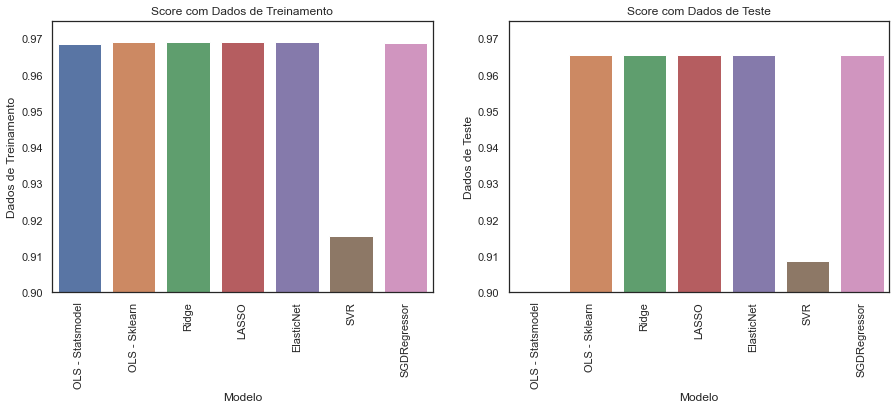

In [574]:
#Construção do gráfico com scores
plt.figure(figsize=(15.0,5.0), )
plt.subplot(1,2,1)
sns.barplot(x=Scores['Modelo'],y=Scores['Dados de Treinamento'],)
plt.xticks(rotation='vertical')
plt.ylim(bottom=.90, top=.975)
plt.title('Score com Dados de Treinamento')
plt.subplot(1,2,2)
sns.barplot(x=Scores['Modelo'],y=Scores['Dados de Teste'])
plt.xticks(rotation='vertical')
plt.ylim(bottom=.90, top=.975)
plt.title('Score com Dados de Teste')

## 6.3 Apresentação dos Resultados - Dashboard

In [575]:
Dados_viz['bairro'].unique()

['portao', 'agua-verde', 'centro', 'ecoville', 'batel', 'cabral', 'cristo-rei']
Categories (7, object): ['portao', 'agua-verde', 'centro', 'ecoville', 'batel', 'cabral', 'cristo-rei']

In [576]:
#Substituição dos rótulos de bairros para apresentação nos gráficos
Dados_viz['bairro']=Dados_viz['bairro'].replace('agua-verde','Água-Verde'
                                           ).replace('batel','Batel'
                                                    ).replace('cristo-rei','Cristo-Rei'
                                                             ).replace('ecoville','Ecoville'
                                                                      ).replace('portao','Portão'
                                                                               ).replace('centro','Centro'
                                                                                        ).replace('cabral','Cabral')


In [577]:
#inclusão da coluna com valores preditos com dados do modelo 5
Dados_viz['preco previsto'] = modelo_5.predict(X_Dados)
Dados_viz['outlierstr'] = Dados_viz.outlier.astype('string')
Dados_viz['suitesstr'] = Dados_viz.suites.astype('string')
Dados_viz.head()

,preco,area,quartos,banheiros,vagas,suites,bairro,População,População(%),Area_bairro,Área(%),Densidade_populacional,preco_metro,preco_ajustado_mod_pre,preco_so,outlier,preco previsto,outlierstr,suitesstr
0,286000,63.00,2.0,2.0,1.0,1.0,Portão,42038,2.4,5838,1.3,7.2,4539.682540,178688.066722,286000.0,não,214256.466984,não,1.0
1,328000,75.00,3.0,2.0,1.0,1.0,Portão,42038,2.4,5838,1.3,7.2,4373.333333,223934.106039,328000.0,não,268288.488732,não,1.0
2,370000,62.77,2.0,2.0,2.0,1.0,Portão,42038,2.4,5838,1.3,7.2,5894.535606,391521.325376,370000.0,não,414950.913863,não,1.0
3,295000,62.88,2.0,2.0,1.0,1.0,Portão,42038,2.4,5838,1.3,7.2,4691.475827,207258.949286,295000.0,não,237726.163295,não,1.0
4,260000,75.00,3.0,2.0,1.0,1.0,Portão,42038,2.4,5838,1.3,7.2,3466.666667,48655.790536,260000.0,não,123913.320798,não,1.0


In [578]:
#Importação das bibliotecas
from bokeh.io import curdoc
from bokeh.layouts import column, row, WidgetBox
from bokeh.models import ColumnDataSource, Slider, TextInput, CheckboxGroup, Div
from bokeh.plotting import figure, output_file, show
from bokeh.models import CustomJS, ColumnDataSource, CheckboxGroup, Column, Line, Circle, Row, NumeralTickFormatter
from bokeh.plotting import figure, show
from bokeh.transform import jitter
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10_10, Spectral6, Spectral5,Spectral8, Spectral4
from bokeh.models.ranges import Range1d

###############################

#Construção de título e kpis

heading = Div(text="""<h1><b> <font color="#2b83ba">   Dashboard >>>>   Preços de Apartamentos em Curitiba - PR</b>
             (Bairros Selecionados)</font></h1>""",align='center', css_classes=['myclass'],
              background='white', width_policy='max', min_width=1870, max_width=1870, width=1870)

largura_kpi = 366

alfa = (Dados_viz['preco'].sum()/Dados_viz['area'].sum()).round(2)
kpi = Div(text="""<h2 align=”center”><b><font color="#2b83ba">   Preço Médio por Metro²:</font></b><br><font color="#d53e4f">
          R$ %s/m²</font></h2>"""%alfa, align='center', width_policy='max', min_width=largura_kpi, max_width=largura_kpi,
          width=largura_kpi, sizing_mode="scale_height", css_classes=['myclass'],background='white')

beta = Dados_viz['area'].mean()
kpi1 = Div(text="""<h2><b><font color="##2b83ba">   Área Média por Unidade:</font></b><br><font color="#d53e4f">
           %.2f m²/unidade </font></h2>"""%round(beta,2), align='center', width_policy='max', min_width=largura_kpi,
           max_width=largura_kpi, width=largura_kpi, sizing_mode="scale_height", css_classes=['myclass'],background='white')

charlie= Dados_viz['quartos'].mean()
kpi2 = Div(text="""<h2><b><font color="##2b83ba"> Número Médio de Quartos:</font></b><br><font color="#d53e4f">
           %.2f quartos/unidade </font></h2>"""%round(charlie,2), align='center', width_policy='max',
           min_width=largura_kpi, max_width=largura_kpi, width=largura_kpi, sizing_mode="scale_height",
           css_classes=['myclass'],background='white')

delta= Dados_viz['suites'].mean()
kpi3 = Div(text="""<h2><b><font color="##2b83ba"> Número Médio de Suítes:</font></b><br><font color="#d53e4f">
            %.2f suítes/unidade </font></h2>"""%round(delta,2), align='center', width_policy='max', 
           min_width=largura_kpi, max_width=largura_kpi, width=largura_kpi, sizing_mode="scale_height",
           css_classes=['myclass'],background='white')

echo= Dados_viz['vagas'].mean()
kpi4 = Div(text="""<h2><b><font color="##2b83ba"> Número Médio de Vagas:</font></b><br><font color="#d53e4f">
           %.2f vagas/unidade </font></h2>"""%round(echo,2), align='center', width_policy='max',
           min_width=largura_kpi, max_width=largura_kpi, width=largura_kpi, sizing_mode="scale_height",
           css_classes=['myclass'],background='white')

###################################################

#Gráfico Principal

data2 = dict(quartos = Dados_viz.quartos.astype('int').astype('string'), 
x = Dados_viz.area, 
y = Dados_viz.preco.astype('float'),
z = Dados_viz.quartos.astype('int').astype('string')   )

data2 = pd.DataFrame(data2)

data_source2 = ColumnDataSource(data2)
source2 = ColumnDataSource(dict(x = Dados_viz.area.tolist(),
                                y = Dados_viz.preco.tolist(),
                                z = Dados_viz.quartos.astype('int').astype('string').tolist()))
label2=sorted(['1','2','3','4','5','6'],key=int)

plot2 = figure(plot_width=1150, plot_height=400,tools="hover",
               tooltips=[("Área", "@{x}{0.2f} m²"),("Preço ","R$ @{y}{,0.2f}")],
               toolbar_location=None, title="Preço x Tamanho do Apartamento")
plot2.circle('x', 'y', line_width = 2, source = source2, color=factor_cmap("z", Spectral5, label2), legend_field='z')
plot2.yaxis[0].formatter = NumeralTickFormatter(format="0,0.00")
plot2.xaxis.axis_label = "Área (m²)"
plot2.yaxis.axis_label = "Preço (R$)"

callback = CustomJS(args = {'source': source2, 'data_source': data_source2},
code = """
var data = data_source.data;
var s_data = source.data;
var quartos = data['quartos'];
var select_vals = cb_obj.active;
console.log(select_vals);
var x_data = data['x'];
var y_data = data['y'];
var z_data = data['z'];
var x = s_data['x'];
x.length = 0;
var y = s_data['y'];
y.length = 0;
var z = s_data['z'];
z.length = 0;
for (var i = 0; i < x_data.length; i++) {
    if (select_vals.indexOf(quartos[i]-1) >= 0) {
        x.push(x_data[i]);
        y.push(y_data[i]);
        z.push(z_data[i]);
        }
}
source.change.emit();
console.log("callback completed");
""")

chkbxgrp2 = CheckboxGroup(inline=True, labels = ['1 Quarto', '2 Quartos', '3 Quartos','4 Quartos','5 Quartos'],
                         active=[0,1,2,3,4,5], background='white', default_size=1145, align='start')
chkbxgrp2.js_on_change('active', callback)


###################################################
#Gráfico Barra Horizontal 1 - Preço/m²

Bairros = Dados_viz.bairro.unique().tolist()
source3 = ColumnDataSource(Dados_viz)
plot3 = figure(plot_width=570, plot_height=330, y_range=Bairros, 
           title="Preço por metro quadrado", toolbar_location=None, tools="hover",
               tooltips=[("Preço por m²", "R$ @{preco_metro}{,0.2f}/m²")])
plot3.circle(x='preco_metro', y=jitter('bairro', width=0.6, range=plot3.y_range),
             source=source3, alpha=0.3, color=factor_cmap("bairro", Spectral6, Bairros))


plot3.x_range.range_padding = 0
plot3.xaxis.axis_label = "R$/m²"
plot3.ygrid.grid_line_color = None



###################################################

#Gráfico Barra Horizontal 2 - Densidade Populacional

Bairros = Dados_viz.bairro.unique().tolist()
group = Dados_viz.groupby('bairro')
source4 = ColumnDataSource(group)

plot4 = figure(y_range=Bairros, x_range=(0,12), plot_width=570, plot_height=330, toolbar_location=None,
           title="Densidade Populacional", tools="hover", 
               tooltips=[("Densidade populacional", "@{Densidade_populacional_max}{0.2f} hab/km²")])
plot4.hbar(y="bairro", left=0, right='Densidade_populacional_max', height=0.6,
           source=source4, fill_alpha=1., fill_color=factor_cmap("bairro", Spectral6, Bairros))

plot4.ygrid.grid_line_color = None
plot4.xaxis.axis_label = "mil habitantes/km²"
plot4.outline_line_color = None

###########################

#Gráfico Barra Vertical Empilhada 1 - Quartos

bairros = sorted(Dados_viz['bairro'].unique().to_list())
quartos = sorted(list(Dados_viz['quartos'].astype('int').astype('string').unique()), key=int)

quartos_count = Dados_viz[['quartos','bairro','preco']]
quartos_count['quartos'] = quartos_count['quartos'].astype('int')
quartos_count = pd.pivot_table(quartos_count, values="preco", index=['bairro'],
                               columns=["quartos"], aggfunc=np.count_nonzero)
quartos_count = quartos_count.fillna(value=0)

k0='bairros'
k1='1'
k2='2'
k3='3'
k4='4'
k5='5'



v0=quartos_count.index.to_list()
v1=quartos_count[1].to_list()
v2=quartos_count[2].to_list()
v3=quartos_count[3].to_list()
v4=quartos_count[4].to_list()
v5=quartos_count[5].to_list()


dado={k0:v0,
    k1:v1,
     k2:v2,
     k3:v3,
     k4:v4,
     k5:v5
   }
dado

source5 = ColumnDataSource(data=dado)

plot5 = figure(x_range=bairros, plot_width=700, plot_height=250, title="Contagem de apartamentos por número de quartos",
           toolbar_location=None, tools="hover", tooltips="$name quartos: @$name unidades")

plot5.vbar_stack(quartos, x='bairros', width=0.9, color=Spectral5, source=source5,#pode ser colunadatasource,
             legend_label=quartos)

plot5.y_range.start = 0
plot5.y_range.end = 800
plot5.x_range.range_padding = 0.1
plot5.xgrid.grid_line_color = None
plot5.axis.minor_tick_line_color = None
plot5.outline_line_color = None
plot5.legend.location = "top_left"
plot5.legend.orientation = "horizontal"

###########################

#Gráfico Barra Vertical Empilhada 2 - Suítes

bairros = sorted(Dados_viz['bairro'].unique().to_list())
suites = sorted(list(Dados_viz['suites'].astype('int').astype('string').unique()), key=int)

suites_count = Dados_viz[['suites','bairro','preco']]
suites_count['suites'] = suites_count['suites'].astype('int')
suites_count = pd.pivot_table(suites_count, values="preco", index=['bairro'], 
                              columns=["suites"], aggfunc=np.count_nonzero)
suites_count = suites_count.fillna(value=0)

k0='bairros'
k1='1'
k2='2'
k3='3'
k4='4'




v0=suites_count.index.to_list()
v1=suites_count[1].to_list()
v2=suites_count[2].to_list()
v3=suites_count[3].to_list()
v4=suites_count[4].to_list()



dado={k0:v0,
    k1:v1,
     k2:v2,
     k3:v3,
     k4:v4
     }
dado

source6 = ColumnDataSource(data=dado)

plot6 = figure(x_range=bairros, plot_width=700, plot_height=250, title="Contagem de apartamentos por número de suítes",
           toolbar_location=None, tools="hover", tooltips="$name suites: @$name unidades")

plot6.vbar_stack(suites, x='bairros', width=0.9, color=Spectral4, source=source6,#pode ser colunadatasource,
             legend_label=suites)

plot6.y_range.start = 0
plot6.y_range.end = 800
plot6.x_range.range_padding = 0.1
plot6.xgrid.grid_line_color = None
plot6.axis.minor_tick_line_color = None
plot6.outline_line_color = None
plot6.legend.location = "top_left"
plot6.legend.orientation = "horizontal"

###########################

#Gráfico Barra Vertical Empilhada 3 - Vagas

bairros = sorted(Dados_viz['bairro'].unique().to_list())
vagas = sorted(list(Dados_viz['vagas'].astype('int').astype('string').unique()), key=int)

vagas_count = Dados_viz[['vagas','bairro','preco']]
vagas_count['vagas'] = vagas_count['vagas'].astype('int')
vagas_count = pd.pivot_table(vagas_count, values="preco", index=['bairro'], 
                             columns=["vagas"], aggfunc=np.count_nonzero)
vagas_count = vagas_count.fillna(value=0)

k0='bairros'
k1='1'
k2='2'
k3='3'
k4='4'
k5='5'


v0=vagas_count.index.to_list()
v1=vagas_count[1].to_list()
v2=vagas_count[2].to_list()
v3=vagas_count[3].to_list()
v4=vagas_count[4].to_list()
v5=vagas_count[5].to_list()

dado={k0:v0,
    k1:v1,
     k2:v2,
     k3:v3,
     k4:v4,
     k5:v5
     
     }
dado

source7 = ColumnDataSource(data=dado)

plot7 = figure(x_range=bairros, plot_width=700, plot_height=250, title="Contagem de apartamentos por número de vagas",
           toolbar_location=None, tools="hover", tooltips="$name vagas: @$name unidades")

plot7.vbar_stack(vagas, x='bairros', width=0.9, color=Spectral5, source=source7,#pode ser colunadatasource,
             legend_label=vagas)

plot7.y_range.start = 0
plot7.y_range.end = 800
plot7.x_range.range_padding = 0.1
plot7.xgrid.grid_line_color = None
plot7.axis.minor_tick_line_color = None
plot7.outline_line_color = None
plot7.legend.location = "top_left"
plot7.legend.orientation = "horizontal"

###########################


#configuração do Layout e geração do arquivo .html

layout = Column(Row(heading,margin=(5,5,5,5)),
                Row(kpi,kpi1,kpi2, kpi3, kpi4,  margin=(5,5,5,5)),
                Row(
                    Column(
                        Row(Column(
                            chkbxgrp2,
                            plot2,margin=(0,5,5,5))),
                        
                        Row(Column(plot3,margin=(5,5,5,0)),
                            Column(plot4,margin=(5,5,5,5)),
                            margin=(5,5,5,5)
                           ),margin=(0,5,5,5)),
                    Column(
                        Row(plot5, margin=(5,5,5,5)),
                        Row(plot6, margin=(5,5,5,5)),
                        Row(plot7, margin=(5,5,5,5)),
                          )
                ),
                
                css_classes=['myclass'],  background='#e2eef4', width=1920
               )
                
output_file("Dashboard.html", title="Dashboard")


show(layout)

